# Ford GoBike's trip data exploration
## by Delia Amarandei

## Preliminary Wrangling

This documents explores a dataset that contains information about individual rides made in a bike-sharing system covering the greater San Francisco Bay area.

In [3]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import requests
import zipfile
import geopandas as gpd
from shapely.geometry import Point, Polygon
import descartes

%matplotlib inline

In [4]:
# Extract the data programatically in a csv file
url = 'https://s3.amazonaws.com/fordgobike-data/2017-fordgobike-tripdata.csv'
response = requests.get(url)

In [5]:
with open('2017-fordgobike-tripdata.csv', mode = 'wb') as file:
    file.write(response.content)

In [6]:
df_2017 = pd.read_csv('2017-fordgobike-tripdata.csv', sep = ',')
df_2017.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender
0,80110,2017-12-31 16:57:39.6540,2018-01-01 15:12:50.2450,74,Laguna St at Hayes St,37.776435,-122.426244,43,San Francisco Public Library (Grove St at Hyde...,37.778768,-122.415929,96,Customer,1987.0,Male
1,78800,2017-12-31 15:56:34.8420,2018-01-01 13:49:55.6170,284,Yerba Buena Center for the Arts (Howard St at ...,37.784872,-122.400876,96,Dolores St at 15th St,37.766210,-122.426614,88,Customer,1965.0,Female
2,45768,2017-12-31 22:45:48.4110,2018-01-01 11:28:36.8830,245,Downtown Berkeley BART,37.870348,-122.267764,245,Downtown Berkeley BART,37.870348,-122.267764,1094,Customer,NaN,NaN
3,62172,2017-12-31 17:31:10.6360,2018-01-01 10:47:23.5310,60,8th St at Ringold St,37.774520,-122.409449,5,Powell St BART Station (Market St at 5th St),37.783899,-122.408445,2831,Customer,NaN,NaN
4,43603,2017-12-31 14:23:14.0010,2018-01-01 02:29:57.5710,239,Bancroft Way at Telegraph Ave,37.868813,-122.258764,247,Fulton St at Bancroft Way,37.867789,-122.265896,3167,Subscriber,1997.0,Female


In [7]:
df_2017.shape

(519700, 15)

In [8]:
# Create list of all the zip files doanloaded manually
zip_files = ['201801-fordgobike-tripdata.csv.zip',
         '201802-fordgobike-tripdata.csv.zip',
         '201803-fordgobike-tripdata.csv.zip',
         '201804-fordgobike-tripdata.csv.zip',
         '201805-fordgobike-tripdata.csv.zip',
         '201806-fordgobike-tripdata.csv.zip',
         '201807-fordgobike-tripdata.csv.zip',
         '201808-fordgobike-tripdata.csv.zip',
         '201809-fordgobike-tripdata.csv.zip',
         '201810-fordgobike-tripdata.csv.zip',
         '201811-fordgobike-tripdata.csv.zip',
         '201812-fordgobike-tripdata.csv.zip',
         '201901-fordgobike-tripdata.csv.zip',
         '201902-fordgobike-tripdata.csv.zip',
         '201903-fordgobike-tripdata.csv.zip',
         '201904-fordgobike-tripdata.csv.zip']

# Extract the csv files from the zipped ones
for f in zip_files:
    with zipfile.ZipFile(f, 'r') as myzip:
        myzip.extractall()

In [9]:
# Create list of all the csv files
csv_files = ['201801-fordgobike-tripdata.csv',
         '201802-fordgobike-tripdata.csv',
         '201803-fordgobike-tripdata.csv',
         '201804-fordgobike-tripdata.csv',
         '201805-fordgobike-tripdata.csv',
         '201806-fordgobike-tripdata.csv',
         '201807-fordgobike-tripdata.csv',
         '201808-fordgobike-tripdata.csv',
         '201809-fordgobike-tripdata.csv',
         '201810-fordgobike-tripdata.csv',
         '201811-fordgobike-tripdata.csv',
         '201812-fordgobike-tripdata.csv',
         '201901-fordgobike-tripdata.csv',
         '201902-fordgobike-tripdata.csv',
         '201903-fordgobike-tripdata.csv',
         '201904-fordgobike-tripdata.csv']

In [10]:
# Combine all files in the list
combined_csv = pd.concat([pd.read_csv(f) for f in csv_files])
# Export to csv
combined_csv.to_csv( "combined_csv.csv", index=False, encoding='utf-8-sig')

In [11]:
df_20189 = pd.read_csv('combined_csv.csv', sep = ',')
df_20189.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,75284,2018-01-31 22:52:35.2390,2018-02-01 19:47:19.8240,120.0,Mission Dolores Park,37.761420,-122.426435,285.0,Webster St at O'Farrell St,37.783521,-122.431158,2765,Subscriber,1986.0,Male,No
1,85422,2018-01-31 16:13:34.3510,2018-02-01 15:57:17.3100,15.0,San Francisco Ferry Building (Harry Bridges Pl...,37.795392,-122.394203,15.0,San Francisco Ferry Building (Harry Bridges Pl...,37.795392,-122.394203,2815,Customer,NaN,NaN,No
2,71576,2018-01-31 14:23:55.8890,2018-02-01 10:16:52.1160,304.0,Jackson St at 5th St,37.348759,-121.894798,296.0,5th St at Virginia St,37.325998,-121.877120,3039,Customer,1996.0,Male,No
3,61076,2018-01-31 14:53:23.5620,2018-02-01 07:51:20.5000,75.0,Market St at Franklin St,37.773793,-122.421239,47.0,4th St at Harrison St,37.780955,-122.399749,321,Customer,NaN,NaN,No
4,39966,2018-01-31 19:52:24.6670,2018-02-01 06:58:31.0530,74.0,Laguna St at Hayes St,37.776435,-122.426244,19.0,Post St at Kearny St,37.788975,-122.403452,617,Subscriber,1991.0,Male,No


In [12]:
# There is one additional column in the 2018-2019 data
print(df_2017.shape)
print(df_20189.shape)

(519700, 15)
(2734625, 16)


In [13]:
# Add missing column bike_share_for_all_trip to the df_2017
df_2017['bike_share_for_all_trip'] = np.nan

In [14]:
# Combine the two dataframes
df = pd.concat([df_2017, df_20189], ignore_index=True)

In [15]:
print(df.shape)
df.head()

(3254325, 16)


,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,80110,2017-12-31 16:57:39.6540,2018-01-01 15:12:50.2450,74.0,Laguna St at Hayes St,37.776435,-122.426244,43.0,San Francisco Public Library (Grove St at Hyde...,37.778768,-122.415929,96,Customer,1987.0,Male,NaN
1,78800,2017-12-31 15:56:34.8420,2018-01-01 13:49:55.6170,284.0,Yerba Buena Center for the Arts (Howard St at ...,37.784872,-122.400876,96.0,Dolores St at 15th St,37.766210,-122.426614,88,Customer,1965.0,Female,NaN
2,45768,2017-12-31 22:45:48.4110,2018-01-01 11:28:36.8830,245.0,Downtown Berkeley BART,37.870348,-122.267764,245.0,Downtown Berkeley BART,37.870348,-122.267764,1094,Customer,NaN,NaN,NaN
3,62172,2017-12-31 17:31:10.6360,2018-01-01 10:47:23.5310,60.0,8th St at Ringold St,37.774520,-122.409449,5.0,Powell St BART Station (Market St at 5th St),37.783899,-122.408445,2831,Customer,NaN,NaN,NaN
4,43603,2017-12-31 14:23:14.0010,2018-01-01 02:29:57.5710,239.0,Bancroft Way at Telegraph Ave,37.868813,-122.258764,247.0,Fulton St at Bancroft Way,37.867789,-122.265896,3167,Subscriber,1997.0,Female,NaN


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3254325 entries, 0 to 3254324
Data columns (total 16 columns):
duration_sec               int64
start_time                 object
end_time                   object
start_station_id           float64
start_station_name         object
start_station_latitude     float64
start_station_longitude    float64
end_station_id             float64
end_station_name           object
end_station_latitude       float64
end_station_longitude      float64
bike_id                    int64
user_type                  object
member_birth_year          float64
member_gender              object
bike_share_for_all_trip    object
dtypes: float64(7), int64(2), object(7)
memory usage: 397.3+ MB


In [17]:
# First fillna and convert to integer
df.start_station_id = df.start_station_id.fillna(0)
df.end_station_id = df.end_station_id.fillna(0)
df.member_birth_year = df.member_birth_year.fillna(0)

df.start_station_id = df.start_station_id.astype(int)
df.end_station_id = df.end_station_id.astype(int)
df.member_birth_year = df.member_birth_year.astype(int)

In [18]:
# Change some of the datatypes

# To datetime
df.start_time = pd.to_datetime(df.start_time)
df.end_time = pd.to_datetime(df.end_time)

# To string
df.start_station_id = df.start_station_id.astype(str)
df.end_station_id = df.end_station_id.astype(str)
df.bike_id = df.bike_id.astype(str)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3254325 entries, 0 to 3254324
Data columns (total 16 columns):
duration_sec               int64
start_time                 datetime64[ns]
end_time                   datetime64[ns]
start_station_id           object
start_station_name         object
start_station_latitude     float64
start_station_longitude    float64
end_station_id             object
end_station_name           object
end_station_latitude       float64
end_station_longitude      float64
bike_id                    object
user_type                  object
member_birth_year          int64
member_gender              object
bike_share_for_all_trip    object
dtypes: datetime64[ns](2), float64(4), int64(2), object(8)
memory usage: 397.3+ MB


In [19]:
df_master = df.copy()

In [20]:
df_master.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3254325 entries, 0 to 3254324
Data columns (total 16 columns):
duration_sec               int64
start_time                 datetime64[ns]
end_time                   datetime64[ns]
start_station_id           object
start_station_name         object
start_station_latitude     float64
start_station_longitude    float64
end_station_id             object
end_station_name           object
end_station_latitude       float64
end_station_longitude      float64
bike_id                    object
user_type                  object
member_birth_year          int64
member_gender              object
bike_share_for_all_trip    object
dtypes: datetime64[ns](2), float64(4), int64(2), object(8)
memory usage: 397.3+ MB


In [21]:
# Create function in order to calculate distance in km between the starting and ending station
def haversine_np(lon1, lat1, lon2, lat2):
    """
    Calculate the great circle distance between two points
    on the earth (specified in decimal degrees)

    All args must be of equal length.    

    """
    lon1, lat1, lon2, lat2 = map(np.radians, [lon1, lat1, lon2, lat2])

    dlon = lon2 - lon1
    dlat = lat2 - lat1

    a = np.sin(dlat/2.0)**2 + np.cos(lat1) * np.cos(lat2) * np.sin(dlon/2.0)**2

    c = 2 * np.arcsin(np.sqrt(a))
    km = 6367 * c
    return km

In [22]:
km = haversine_np(df_master['start_station_longitude'],df_master['start_station_latitude'],
                  df_master['end_station_longitude'],df_master['end_station_latitude'])

In [23]:
# Add new column with distance between start and end station location
df_master['distance_km'] = haversine_np(df_master['start_station_longitude'],df_master['start_station_latitude'],
                                        df_master['end_station_longitude'],df_master['end_station_latitude'])

In [24]:
geometry_start = [Point(xy) for xy in zip(df_master['start_station_longitude'], df_master['start_station_latitude'])]
geometry_start

 ...]

In [25]:
# Add new geometry points in order to be able to visualize data on a shape file
df_master['geometry_start'] = [Point(xy) for xy in zip(df_master['start_station_longitude'], 
                                                       df_master['start_station_latitude'])]
df_master['geometry_end'] = [Point(xy) for xy in zip(df_master['end_station_longitude'], 
                                                     df_master['end_station_latitude'])]
df_master.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip,distance_km,geometry_start,geometry_end
0,80110,2017-12-31 16:57:39.654,2018-01-01 15:12:50.245,74,Laguna St at Hayes St,37.776435,-122.426244,43,San Francisco Public Library (Grove St at Hyde...,37.778768,-122.415929,96,Customer,1987,Male,NaN,0.942339,POINT (-122.4262440204621 37.77643481920474),POINT (-122.4159292 37.7787677)
1,78800,2017-12-31 15:56:34.842,2018-01-01 13:49:55.617,284,Yerba Buena Center for the Arts (Howard St at ...,37.784872,-122.400876,96,Dolores St at 15th St,37.766210,-122.426614,88,Customer,1965,Female,NaN,3.067800,POINT (-122.4008756875992 37.78487208436062),POINT (-122.4266136 37.7662102)
2,45768,2017-12-31 22:45:48.411,2018-01-01 11:28:36.883,245,Downtown Berkeley BART,37.870348,-122.267764,245,Downtown Berkeley BART,37.870348,-122.267764,1094,Customer,0,NaN,NaN,0.000000,POINT (-122.2677637 37.8703477),POINT (-122.2677637 37.8703477)
3,62172,2017-12-31 17:31:10.636,2018-01-01 10:47:23.531,60,8th St at Ringold St,37.774520,-122.409449,5,Powell St BART Station (Market St at 5th St),37.783899,-122.408445,2831,Customer,0,NaN,NaN,1.045965,POINT (-122.4094493687153 37.77452040113685),POINT (-122.4084448814392 37.78389935708493)
4,43603,2017-12-31 14:23:14.001,2018-01-01 02:29:57.571,239,Bancroft Way at Telegraph Ave,37.868813,-122.258764,247,Fulton St at Bancroft Way,37.867789,-122.265896,3167,Subscriber,1997,Female,NaN,0.635940,POINT (-122.258764 37.8688126),POINT (-122.2658964 37.8677892)


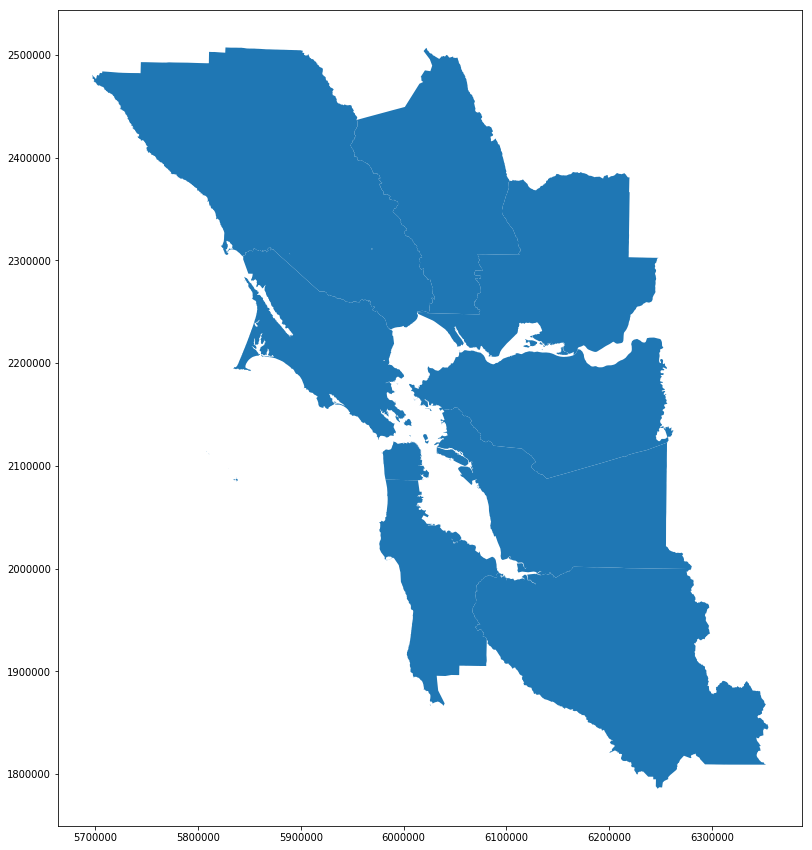

In [26]:
# Load shape file of the San Francisco bay area by counties
sf_map = gpd.read_file('bayarea_county.shp')
fig, ax = plt.subplots(figsize=(15,15))
sf_map.plot(ax =ax);

In [27]:
sf_map

,OBJECTID,FIPSSTCO,COUNTY,geometry
0,1,06001,Alameda,(POLYGON ((6065941.393835939 2104148.464510617...
1,2,06013,Contra Costa,(POLYGON ((6143913.640835939 2209458.230510617...
2,3,06041,Marin,"(POLYGON ((5879149.41783594 2203020.920510617,..."
3,4,06055,Napa,"POLYGON ((6075700.362835939 2441916.530510616,..."
4,5,06075,San Francisco,(POLYGON ((5990480.312835939 2123810.133510617...
5,6,06081,San Mateo,(POLYGON ((5982429.116835939 2086506.362510617...
6,7,06085,Santa Clara,(POLYGON ((6119276.426835939 1993906.078510617...
7,8,06095,Solano,(POLYGON ((6126978.714835939 2223922.729510617...
8,9,06097,Sonoma,(POLYGON ((5696788.259835939 2480446.588510617...


In [28]:
# Create geo dataframe
crs = {'init': 'epsg:4326'}
geo_df = gpd.GeoDataFrame(df_master, crs=crs, geometry=df_master.geometry_start)
sf_map.crs = {'init': 'epsg:2227'}
sf_map = sf_map.to_crs({'init': 'epsg:4326'})

In [29]:
# Add new duration_min column
df_master['duration_min'] = df_master['duration_sec']/60

In [30]:
# Add new month column
df_master['start_month'] = pd.DatetimeIndex(df_master['start_time']).month

In [31]:
# Add new year column
df_master['start_year'] = pd.DatetimeIndex(df_master['start_time']).year

In [32]:
# Add new hour column
df_master['start_hour'] = pd.DatetimeIndex(df_master['start_time']).hour

In [33]:
# Add new weekday column
df_master['start_weekday'] = pd.DatetimeIndex(df_master['start_time']).weekday

In [34]:
# Add new column with the date only
df_master['start_date'] = df_master['start_time'].dt.date

In [35]:
# Add new column with year and month
df_master['start_year_month']=df_master['start_time'].map(lambda x: x.strftime('%Y-%m'))

In [36]:
# Add new age column
df_master['age'] = 2019 - df_master.member_birth_year

In [37]:
# Replace 2019 with 0
df_master['age'].replace(2019, 0, inplace = True)

In [38]:
# Change new columns to string datatype
df_master.start_month = df_master.start_month.astype(str)
df_master.start_year = df_master.start_year.astype(str)
df_master.start_hour = df_master.start_hour.astype(str)
df_master.start_weekday = df_master.start_weekday.astype(str)
df_master.start_year_month = df_master.start_year_month.astype(str)
# Change age columns to int datatype
df_master.age = df_master.age.astype(int)

In [39]:
# Replace 0s in age with NaN
df_master['age'].replace(0, np.nan, inplace = True)

In [40]:
df_master.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,...,geometry_end,geometry,duration_min,start_month,start_year,start_hour,start_weekday,start_date,start_year_month,age
0,80110,2017-12-31 16:57:39.654,2018-01-01 15:12:50.245,74,Laguna St at Hayes St,37.776435,-122.426244,43,San Francisco Public Library (Grove St at Hyde...,37.778768,...,POINT (-122.4159292 37.7787677),POINT (-122.4262440204621 37.77643481920474),1335.166667,12,2017,16,6,2017-12-31,2017-12,32.0
1,78800,2017-12-31 15:56:34.842,2018-01-01 13:49:55.617,284,Yerba Buena Center for the Arts (Howard St at ...,37.784872,-122.400876,96,Dolores St at 15th St,37.766210,...,POINT (-122.4266136 37.7662102),POINT (-122.4008756875992 37.78487208436062),1313.333333,12,2017,15,6,2017-12-31,2017-12,54.0
2,45768,2017-12-31 22:45:48.411,2018-01-01 11:28:36.883,245,Downtown Berkeley BART,37.870348,-122.267764,245,Downtown Berkeley BART,37.870348,...,POINT (-122.2677637 37.8703477),POINT (-122.2677637 37.8703477),762.800000,12,2017,22,6,2017-12-31,2017-12,NaN
3,62172,2017-12-31 17:31:10.636,2018-01-01 10:47:23.531,60,8th St at Ringold St,37.774520,-122.409449,5,Powell St BART Station (Market St at 5th St),37.783899,...,POINT (-122.4084448814392 37.78389935708493),POINT (-122.4094493687153 37.77452040113685),1036.200000,12,2017,17,6,2017-12-31,2017-12,NaN
4,43603,2017-12-31 14:23:14.001,2018-01-01 02:29:57.571,239,Bancroft Way at Telegraph Ave,37.868813,-122.258764,247,Fulton St at Bancroft Way,37.867789,...,POINT (-122.2658964 37.8677892),POINT (-122.258764 37.8688126),726.716667,12,2017,14,6,2017-12-31,2017-12,22.0


In [41]:
df_master.reset_index()

,index,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,...,geometry_end,geometry,duration_min,start_month,start_year,start_hour,start_weekday,start_date,start_year_month,age
0,0,80110,2017-12-31 16:57:39.654,2018-01-01 15:12:50.245,74,Laguna St at Hayes St,37.776435,-122.426244,43,San Francisco Public Library (Grove St at Hyde...,...,POINT (-122.4159292 37.7787677),POINT (-122.4262440204621 37.77643481920474),1335.166667,12,2017,16,6,2017-12-31,2017-12,32.0
1,1,78800,2017-12-31 15:56:34.842,2018-01-01 13:49:55.617,284,Yerba Buena Center for the Arts (Howard St at ...,37.784872,-122.400876,96,Dolores St at 15th St,...,POINT (-122.4266136 37.7662102),POINT (-122.4008756875992 37.78487208436062),1313.333333,12,2017,15,6,2017-12-31,2017-12,54.0
2,2,45768,2017-12-31 22:45:48.411,2018-01-01 11:28:36.883,245,Downtown Berkeley BART,37.870348,-122.267764,245,Downtown Berkeley BART,...,POINT (-122.2677637 37.8703477),POINT (-122.2677637 37.8703477),762.800000,12,2017,22,6,2017-12-31,2017-12,NaN
3,3,62172,2017-12-31 17:31:10.636,2018-01-01 10:47:23.531,60,8th St at Ringold St,37.774520,-122.409449,5,Powell St BART Station (Market St at 5th St),...,POINT (-122.4084448814392 37.78389935708493),POINT (-122.4094493687153 37.77452040113685),1036.200000,12,2017,17,6,2017-12-31,2017-12,NaN
4,4,43603,2017-12-31 14:23:14.001,2018-01-01 02:29:57.571,239,Bancroft Way at Telegraph Ave,37.868813,-122.258764,247,Fulton St at Bancroft Way,...,POINT (-122.2658964 37.8677892),POINT (-122.258764 37.8688126),726.716667,12,2017,14,6,2017-12-31,2017-12,22.0
5,5,9226,2017-12-31 22:51:00.918,2018-01-01 01:24:47.166,30,San Francisco Caltrain (Townsend St at 4th St),37.776598,-122.395282,30,San Francisco Caltrain (Townsend St at 4th St),...,POINT (-122.395282 37.776598),POINT (-122.395282 37.776598),153.766667,12,2017,22,6,2017-12-31,2017-12,NaN
6,6,4507,2017-12-31 23:49:28.422,2018-01-01 01:04:35.619,259,Addison St at Fourth St,37.866249,-122.299371,259,Addison St at Fourth St,...,POINT (-122.2993708 37.866249),POINT (-122.2993708 37.866249),75.116667,12,2017,23,6,2017-12-31,2017-12,28.0
7,7,4334,2017-12-31 23:46:37.196,2018-01-01 00:58:51.211,284,Yerba Buena Center for the Arts (Howard St at ...,37.784872,-122.400876,284,Yerba Buena Center for the Arts (Howard St at ...,...,POINT (-122.4008756875992 37.78487208436062),POINT (-122.4008756875992 37.78487208436062),72.233333,12,2017,23,6,2017-12-31,2017-12,NaN
8,8,4150,2017-12-31 23:37:07.548,2018-01-01 00:46:18.308,20,Mechanics Monument Plaza (Market St at Bush St),37.791300,-122.399051,20,Mechanics Monument Plaza (Market St at Bush St),...,POINT (-122.399051 37.7913),POINT (-122.399051 37.7913),69.166667,12,2017,23,6,2017-12-31,2017-12,NaN
9,9,4238,2017-12-31 23:35:38.145,2018-01-01 00:46:17.053,20,Mechanics Monument Plaza (Market St at Bush St),37.791300,-122.399051,20,Mechanics Monument Plaza (Market St at Bush St),...,POINT (-122.399051 37.7913),POINT (-122.399051 37.7913),70.633333,12,2017,23,6,2017-12-31,2017-12,NaN


In [42]:
df_master.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3254325 entries, 0 to 3254324
Data columns (total 28 columns):
duration_sec               int64
start_time                 datetime64[ns]
end_time                   datetime64[ns]
start_station_id           object
start_station_name         object
start_station_latitude     float64
start_station_longitude    float64
end_station_id             object
end_station_name           object
end_station_latitude       float64
end_station_longitude      float64
bike_id                    object
user_type                  object
member_birth_year          int64
member_gender              object
bike_share_for_all_trip    object
distance_km                float64
geometry_start             object
geometry_end               object
geometry                   object
duration_min               float64
start_month                object
start_year                 object
start_hour                 object
start_weekday              object
start_date       

In [43]:
df_master.shape

(3254325, 28)

In [44]:
df_master.describe()

,duration_sec,start_station_latitude,start_station_longitude,end_station_latitude,end_station_longitude,member_birth_year,distance_km,duration_min,age
count,3.254325e+06,3.254325e+06,3.254325e+06,3.254325e+06,3.254325e+06,3.254325e+06,3.254325e+06,3.254325e+06,3.036159e+06
mean,8.743223e+02,3.776880e+01,-1.223530e+02,3.776874e+01,-1.223519e+02,1.850190e+03,1.698261e+00,1.457204e+01,3.586325e+01
std,2.468547e+03,1.029275e-01,1.601559e-01,1.342571e-01,3.220803e-01,4.960635e+02,3.091085e+01,4.114245e+01,1.043760e+01
min,6.100000e+01,0.000000e+00,-1.224737e+02,0.000000e+00,-1.224737e+02,0.000000e+00,0.000000e+00,1.016667e+00,1.800000e+01
25%,3.510000e+02,3.777106e+01,-1.224117e+02,3.777143e+01,-1.224108e+02,1.975000e+03,8.849484e-01,5.850000e+00,2.800000e+01
50%,5.570000e+02,3.778107e+01,-1.223983e+02,3.778127e+01,-1.223974e+02,1.985000e+03,1.399096e+00,9.283333e+00,3.400000e+01
75%,8.730000e+02,3.779539e+01,-1.222934e+02,3.779625e+01,-1.222935e+02,1.990000e+03,2.126673e+00,1.455000e+01,4.100000e+01
max,8.636900e+04,4.551000e+01,0.000000e+00,4.551000e+01,0.000000e+00,2.001000e+03,1.279031e+04,1.439483e+03,1.410000e+02


### What is the structure of your dataset?

There are 3,254,325 records in the dataset containing information about trips recorded through the bikes rented from Ford GoBike. 
There are numeric variables, such as:
- Trip Duration (seconds)
- Distance km (calculated based on the starting point location and the end point location)
- Age


Categorical variables:
- Member Gender
- User Type (Subscriber or Customer – “Subscriber” = Member or “Customer” = Casual)
- Bike share for all trip (yes or no, only for 2018 & 2019)

Time variables:
- Start Time and Date
- End Time and Date
- Year, month, weekday and hour

Other string variables relevant for the trip:
- Bike id
- Member birth year
- Start & end station id & name

Geographic coordinates:
- End & start station longitude
- End & start station latitude

Most variables are numeric in nature, but the variables cut, color, and clarity are ordered factor variables with the following levels.



### What is/are the main feature(s) of interest in your dataset?

I am interested in discovering what influences the duration of the bike rental, as this is the main tracker of the product's success.

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

I expect that the time factor would influence the distance the most (such as the the hour of the day, the day of the week or the month of the year), but other variables such the fact that the user is a subscriber or a customer, shares the bike or not, demographics or starting and end point locations would also have an impact on the rental duration. 

## Univariate Exploration


First I will check the averages in time for the main varibales.

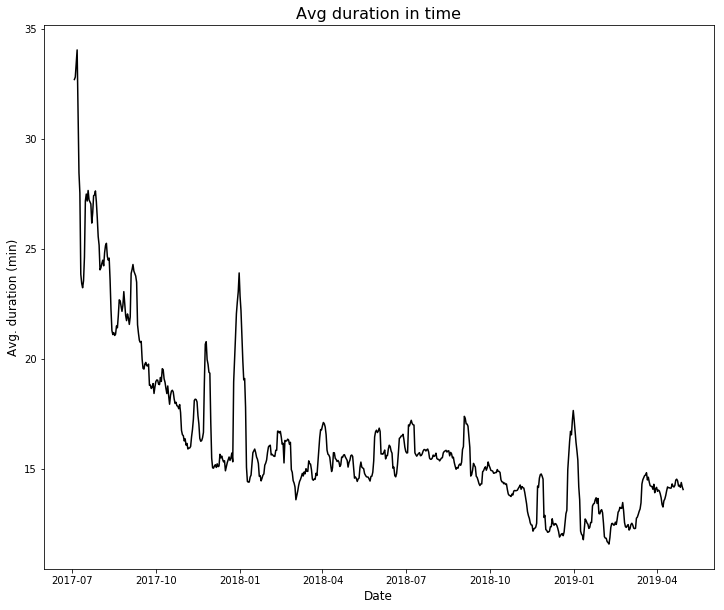

In [45]:
plt.subplots(figsize=(12,10))
df_master.groupby(df_master['start_date']).mean()['duration_min'].rolling(window=7)\
    .mean().plot(kind = 'line', color = "black")
plt.title('Avg duration in time', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Avg. duration (min)', fontsize=12);

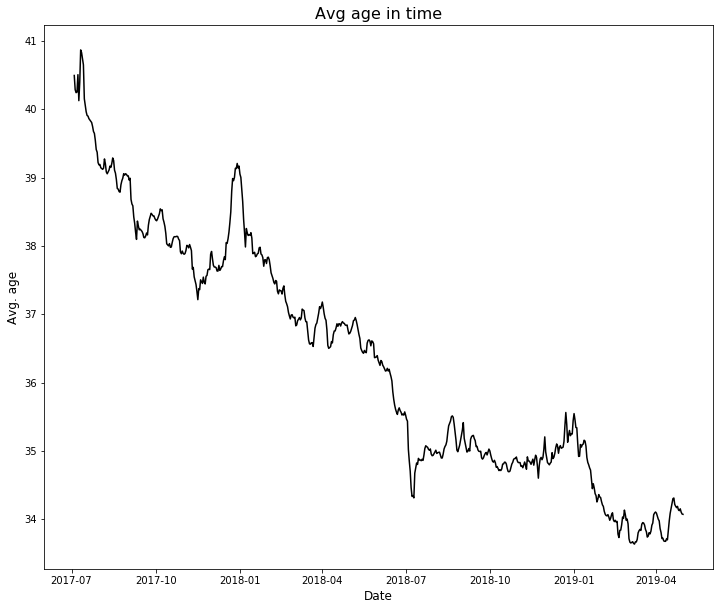

In [46]:
plt.subplots(figsize=(12,10))
df_master.groupby(df_master['start_date']).mean()['age'].rolling(window=7)\
    .mean().plot(kind = 'line', color = "black")
plt.title('Avg age in time', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Avg. age', fontsize=12);

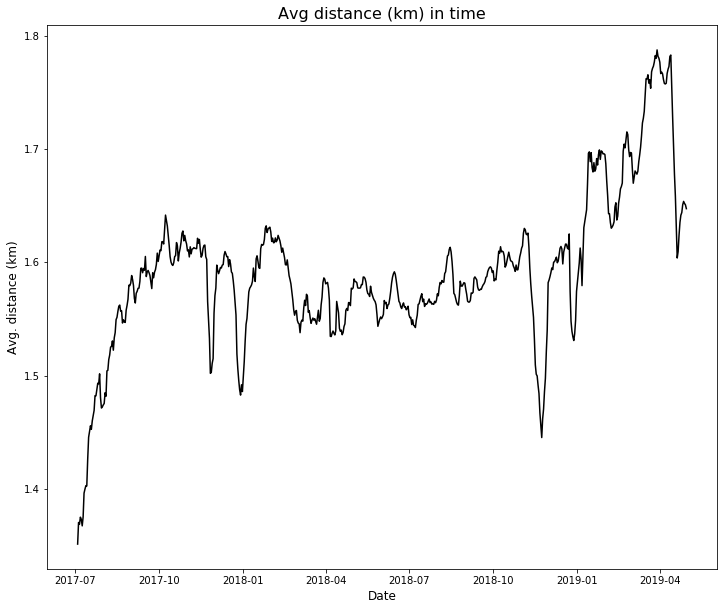

In [52]:
df_distance = df_master.query('distance_km <10')
plt.subplots(figsize=(12,10))
df_master.groupby(df_distance['start_date']).mean()['distance_km'].rolling(window=7).\
    mean().plot(kind = 'line', color = "black")
plt.title('Avg distance (km) in time', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Avg. distance (km)', fontsize=12);

Seems both the duration and age has decreased in time while the distance between the start and end point station has increased which might suggest that more stations were opened.

I will continue by looking at the histograms of the rental duration, age of the users and distance in km between the pick up and drop off.

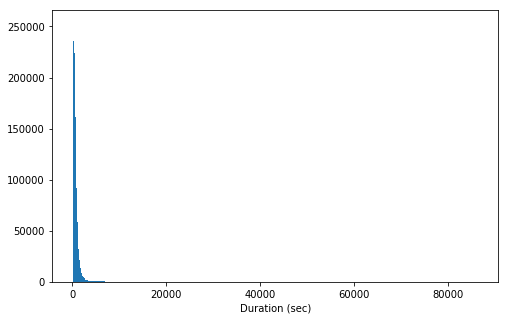

In [56]:
# Standard-scaled plot for duration_sec
binsize = 60
bins = np.arange(0, df_master['duration_sec'].max()+binsize, binsize)

plt.figure(figsize=[8, 5])
plt.hist(data = df_master, x = 'duration_sec', bins = bins)
plt.xlabel('Duration (sec)')
plt.show()

Duration data is highly skewed to the right, it has a long-tailed distribution, with a lot of rentals on the duration short end, and few on the long distance end. 
There seems to be some outliers so I will reduce the data to all entries below 8000 seconds.

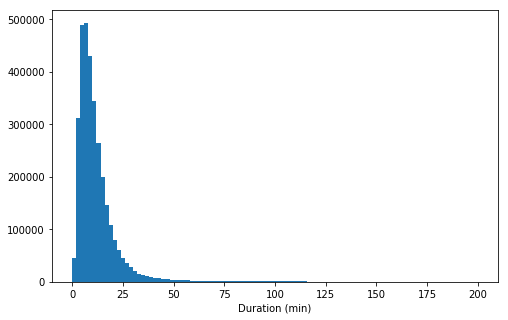

In [55]:
# Standard-scaled plot for duration_sec less than 8000 (this way removing outliers)
binsize = 60
bins = np.arange(0, 8000+binsize, binsize)

plt.figure(figsize=[8, 5])
plt.hist(data = df_master, x = 'duration_sec', bins = bins)
plt.xlabel('Duration (sec)')
plt.show()

As this still doesn't look right, I will use the log-scaled plot.

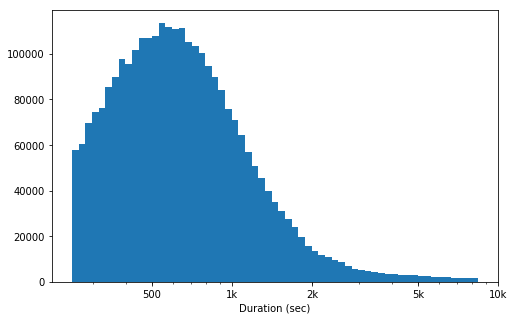

In [57]:
# Log-scaled plot for duration_sec less than 8000
log_binsize = 0.025
bins = 10 ** np.arange(2.4, np.log10(8000)+log_binsize, log_binsize)

plt.figure(figsize=[8, 5])
plt.hist(data = df_master, x = 'duration_sec', bins = bins)
plt.xscale('log')
plt.xticks([500, 1e3, 2e3, 5e3, 1e4], [500, '1k', '2k', '5k', '10k'])
plt.xlabel('Duration (sec)')
plt.show()


This looks much better now, I can clearly see that most bike rentals took up to 1000 seconds.
Next I will check the age distribution.

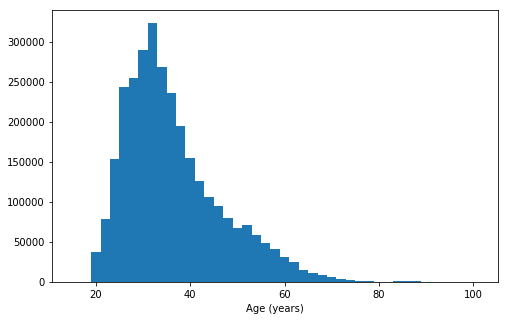

In [58]:
# Standard-scaled plot for age (only less than 100, outliers removed)
binsize = 2
bins = np.arange(15, 100+binsize, binsize)
plt.figure(figsize=[8, 5])
plt.hist(data = df_master, x = 'age', bins = bins)
plt.xlabel('Age (years)')
plt.show()

Since there some entries over 100 years old I removed them as I assumed this was not a real age or maybe a mistake was made by the user when providing the birth year. Most users are between 20 and 40 years old, which was as expected.

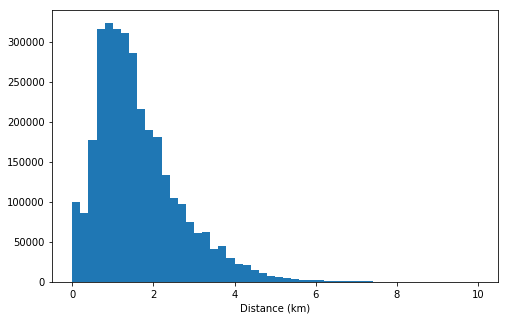

In [59]:
# Standard-scaled plot for km (only less than 10km, outliers removed)
binsize = 0.2
bins = np.arange(0, 10+binsize, binsize)
plt.figure(figsize=[8, 5])
plt.hist(data = df_master, x = 'distance_km', bins = bins)
plt.xlabel('Distance (km)')
plt.show()

I removed the outliers over 10km distance between the start and end station. Seems not so many users brought back the bike to the same station they rented from, most dropped it off to a close by station, which is in line with the duration of the rental ( up to 1000 seconds, so around 16 minutes).

Check the outliers identified for duration, age and distance.

In [60]:
# For duration
len(df_master.query('duration_sec>8000'))

22772

In [61]:
df_master.query('duration_sec>8000').sample(10)

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,...,geometry_end,geometry,duration_min,start_month,start_year,start_hour,start_weekday,start_date,start_year_month,age
1254847,43520,2018-06-13 20:09:08.645,2018-06-14 08:14:29.249,141,Valencia St at Cesar Chavez St,37.747998,-122.420219,121,Mission Playground,37.759210,...,POINT (-122.4213392 37.75921029999999),POINT (-122.4202187 37.7479981),725.333333,6,2018,20,2,2018-06-13,2018-06,34.0
2796540,18155,2019-03-27 12:18:14.973,2019-03-27 17:20:50.422,24,Spear St at Folsom St,37.789677,-122.390428,31,Raymond Kimbell Playground,37.783813,...,POINT (-122.4345588684082 37.78381270927812),POINT (-122.3904285 37.78967670000001),302.583333,3,2019,12,2,2019-03-27,2019-03,24.0
1630622,8867,2018-08-16 15:28:17.389,2018-08-16 17:56:05.383,6,The Embarcadero at Sansome St,37.804770,-122.403234,29,O'Farrell St at Divisadero St,37.782405,...,POINT (-122.4394458532334 37.7824046019341),POINT (-122.403234 37.80477),147.783333,8,2018,15,3,2018-08-16,2018-08,NaN
1342280,13895,2018-07-31 11:39:42.778,2018-07-31 15:31:18.699,8,The Embarcadero at Vallejo St,37.799953,-122.398525,6,The Embarcadero at Sansome St,37.804770,...,POINT (-122.403234 37.80477),POINT (-122.398525 37.799953),231.583333,7,2018,11,1,2018-07-31,2018-07,NaN
270248,61837,2017-10-05 19:25:58.575,2017-10-06 12:36:36.463,245,Downtown Berkeley BART,37.870348,-122.267764,244,Shattuck Ave at Hearst Ave,37.873792,...,POINT (-122.2686176 37.8737917),POINT (-122.2677637 37.8703477),1030.616667,10,2017,19,3,2017-10-05,2017-10,35.0
1910549,82904,2018-09-01 18:41:28.442,2018-09-02 17:43:13.239,0,NaN,37.400000,-121.930000,0,NaN,37.400000,...,POINT (-121.94 37.4),POINT (-121.93 37.4),1381.733333,9,2018,18,5,2018-09-01,2018-09,36.0
2883792,17528,2019-03-17 12:42:06.395,2019-03-17 17:34:15.018,380,Masonic Ave at Turk St,37.779047,-122.447291,375,Grove St at Masonic Ave,37.774836,...,POINT (-122.4465456604958 37.77483629413345),POINT (-122.4472913146019 37.77904665847205),292.133333,3,2019,12,6,2019-03-17,2019-03,35.0
511428,8328,2017-07-07 17:35:51.264,2017-07-07 19:54:39.723,15,San Francisco Ferry Building (Harry Bridges Pl...,37.795392,-122.394203,8,The Embarcadero at Vallejo St,37.799953,...,POINT (-122.398525 37.799953),POINT (-122.394203 37.795392),138.800000,7,2017,17,4,2017-07-07,2017-07,NaN
226732,20029,2017-10-19 07:50:43.628,2017-10-19 13:24:33.529,119,18th St at Noe St,37.761047,-122.432642,119,18th St at Noe St,37.761047,...,POINT (-122.4326417 37.7610471),POINT (-122.4326417 37.7610471),333.816667,10,2017,7,3,2017-10-19,2017-10,NaN
1499587,8481,2018-07-07 22:35:47.020,2018-07-08 00:57:08.716,323,Broadway at Kearny,37.798014,-122.405950,5,Powell St BART Station (Market St at 5th St),37.783899,...,POINT (-122.4084448814392 37.78389935708493),POINT (-122.4059504270553 37.79801364395978),141.350000,7,2018,22,5,2018-07-07,2018-07,37.0


In [62]:
len(df_master.query('duration_sec>8000'))/df_master.shape[0]

0.006997457229993931

Duration seems to be fine even with values as high as over 80000 seconds, however, I will remove those over 8k as they represent a very small amount of data and might interfere with my analysis later.

In [63]:
df_master.drop(df_master.query('duration_sec>8000').index, inplace = True)

In [64]:
# For age
len(df_master.query('age>100'))

1903

In [65]:
df_master.query('age>100').sample(10)

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,...,geometry_end,geometry,duration_min,start_month,start_year,start_hour,start_weekday,start_date,start_year_month,age
227507,526,2017-10-19 09:15:46.212,2017-10-19 09:24:32.400,67,San Francisco Caltrain Station 2 (Townsend St...,37.776639,-122.395526,21,Montgomery St BART Station (Market St at 2nd St),37.789625,...,POINT (-122.400811 37.7896254),POINT (-122.3955263 37.77663920000001),8.766667,10,2017,9,3,2017-10-19,2017-10,117.0
2232957,226,2018-11-04 09:44:54.479,2018-11-04 09:48:40.619,274,Oregon St at Adeline St,37.857567,-122.267558,168,Alcatraz Ave at Shattuck Ave,37.849595,...,POINT (-122.2655689716339 37.84959496777665),POINT (-122.2675583 37.85756720000001),3.766667,11,2018,9,6,2018-11-04,2018-11,119.0
768639,495,2018-03-20 07:09:31.270,2018-03-20 07:17:47.187,30,San Francisco Caltrain (Townsend St at 4th St),37.776598,-122.395282,45,5th St at Howard St,37.781752,...,POINT (-122.405127 37.781752),POINT (-122.395282 37.776598),8.250000,3,2018,7,1,2018-03-20,2018-03,117.0
491279,439,2017-07-21 18:22:41.044,2017-07-21 18:30:00.129,45,5th St at Howard St,37.781752,-122.405127,67,San Francisco Caltrain Station 2 (Townsend St...,37.776639,...,POINT (-122.3955263 37.77663920000001),POINT (-122.405127 37.781752),7.316667,7,2017,18,4,2017-07-21,2017-07,117.0
715327,468,2018-02-02 09:10:43.725,2018-02-02 09:18:32.131,67,San Francisco Caltrain Station 2 (Townsend St...,37.776639,-122.395526,21,Montgomery St BART Station (Market St at 2nd St),37.789625,...,POINT (-122.400811 37.7896254),POINT (-122.3955263 37.77663920000001),7.800000,2,2018,9,4,2018-02-02,2018-02,117.0
2350555,276,2018-12-07 19:59:47.020,2018-12-07 20:04:23.984,182,19th Street BART Station,37.809013,-122.268247,195,Bay Pl at Vernon St,37.812314,...,POINT (-122.2607785463333 37.81231409135146),POINT (-122.2682473 37.8090126),4.600000,12,2018,19,4,2018-12-07,2018-12,119.0
2694513,267,2019-02-11 18:19:18.848,2019-02-11 18:23:46.758,158,Shattuck Ave at Telegraph Ave,37.833279,-122.263490,173,Shattuck Ave at 55th St,37.840364,...,POINT (-122.2644881 37.8403643),POINT (-122.2634901 37.8332786),4.450000,2,2019,18,0,2019-02-11,2019-02,119.0
1708501,1403,2018-08-04 09:34:15.693,2018-08-04 09:57:39.169,268,Ellsworth St at Russell St,37.857490,-122.261578,259,Addison St at Fourth St,37.866249,...,POINT (-122.2993708 37.866249),POINT (-122.2615778446198 37.85749021457153),23.383333,8,2018,9,5,2018-08-04,2018-08,119.0
1644335,490,2018-08-14 18:41:23.647,2018-08-14 18:49:34.644,363,Salesforce Transit Center (Natoma St at 2nd St),37.787492,-122.398285,30,San Francisco Caltrain (Townsend St at 4th St),37.776598,...,POINT (-122.395282 37.776598),POINT (-122.3982846736908 37.78749210438603),8.166667,8,2018,18,1,2018-08-14,2018-08,117.0
714813,651,2018-02-02 10:36:40.891,2018-02-02 10:47:32.549,28,The Embarcadero at Bryant St,37.787168,-122.388098,6,The Embarcadero at Sansome St,37.804770,...,POINT (-122.403234 37.80477),POINT (-122.3880979233036 37.78716801474664),10.850000,2,2018,10,4,2018-02-02,2018-02,108.0


Users older than 100 years old seem impossible to be correct. I will remove these values.

In [66]:
df_master.drop(df_master.query('age > 100').index, inplace = True)

In [67]:
len(df_master.query('age>100'))

0

Since distance between san Francisco and San Jose is around 77km I will check entries with higher distance than 80 km. I decided to remove all entries over 10 since there are few outliers in the data which might interfere with the analysis later. 

In [68]:
# For distance_km I will check entries with more than 80km
len(df_master.query('distance_km>10'))

167

In [69]:
df_master.query('distance_km>10')

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,...,geometry_end,geometry,duration_min,start_month,start_year,start_hour,start_weekday,start_date,start_year_month,age
10184,5825,2017-12-25 12:53:25.235,2017-12-25 14:30:30.292,148,Horton St at 40th St,37.829705,-122.287610,22,Howard St at Beale St,37.789756,...,POINT (-122.394643 37.789756),POINT (-122.2876102 37.82970460000001),97.083333,12,2017,12,0,2017-12-25,2017-12,NaN
10185,5817,2017-12-25 12:53:21.164,2017-12-25 14:30:18.464,148,Horton St at 40th St,37.829705,-122.287610,22,Howard St at Beale St,37.789756,...,POINT (-122.394643 37.789756),POINT (-122.2876102 37.82970460000001),96.950000,12,2017,12,0,2017-12-25,2017-12,NaN
124544,2037,2017-11-17 15:22:53.773,2017-11-17 15:56:51.165,209,45th St at MLK Jr Way,37.833558,-122.267418,4,Cyril Magnin St at Ellis St,37.785881,...,POINT (-122.4089150084319 37.78588062694133),POINT (-122.2674183 37.83355770000001),33.950000,11,2017,15,4,2017-11-17,2017-11,50.0
185190,5471,2017-10-31 07:57:18.251,2017-10-31 09:28:29.835,195,Bay Pl at Vernon St,37.812314,-122.260779,312,San Jose Diridon Station,37.329732,...,POINT (-121.901782 37.329732),POINT (-122.2607785463333 37.81231409135146),91.183333,10,2017,7,1,2017-10-31,2017-10,43.0
192832,2278,2017-10-28 15:07:37.864,2017-10-28 15:45:36.831,41,Golden Gate Ave at Polk St,37.781270,-122.418740,209,45th St at MLK Jr Way,37.833558,...,POINT (-122.2674183 37.83355770000001),POINT (-122.41874 37.78127),37.966667,10,2017,15,5,2017-10-28,2017-10,50.0
194062,3331,2017-10-28 08:40:40.892,2017-10-28 09:36:12.432,183,Telegraph Ave at 19th St,37.808702,-122.269927,16,Steuart St at Market St,37.794130,...,POINT (-122.39443 37.79413),POINT (-122.2699271 37.8087021),55.516667,10,2017,8,5,2017-10-28,2017-10,37.0
194069,2691,2017-10-28 08:45:14.236,2017-10-28 09:30:05.408,183,Telegraph Ave at 19th St,37.808702,-122.269927,16,Steuart St at Market St,37.794130,...,POINT (-122.39443 37.79413),POINT (-122.2699271 37.8087021),44.850000,10,2017,8,5,2017-10-28,2017-10,NaN
194070,2726,2017-10-28 08:44:34.005,2017-10-28 09:30:00.388,183,Telegraph Ave at 19th St,37.808702,-122.269927,16,Steuart St at Market St,37.794130,...,POINT (-122.39443 37.79413),POINT (-122.2699271 37.8087021),45.433333,10,2017,8,5,2017-10-28,2017-10,NaN
194092,2308,2017-10-28 08:26:11.382,2017-10-28 09:04:40.314,209,45th St at MLK Jr Way,37.833558,-122.267418,41,Golden Gate Ave at Polk St,37.781270,...,POINT (-122.41874 37.78127),POINT (-122.2674183 37.83355770000001),38.466667,10,2017,8,5,2017-10-28,2017-10,50.0
194597,6900,2017-10-27 18:37:06.365,2017-10-27 20:32:07.292,181,Grand Ave at Webster St,37.811377,-122.265192,74,Laguna St at Hayes St,37.776435,...,POINT (-122.4262440204621 37.77643481920474),POINT (-122.2651925 37.8113768),115.000000,10,2017,18,4,2017-10-27,2017-10,NaN


In [70]:
len(df_master.query('end_station_name == "SF Test Station"'))

18

Based on the end station name these entries look like testing so I will remove also these entries.

In [71]:
df_master.drop(df_master.query('distance_km>10').index, inplace = True)

Next step is to check the number of entries for each month of the year, day of the week and hour of the day. It will be interesting to check if there is any seasonability and peaks of the day when most users rent bicycles. 

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


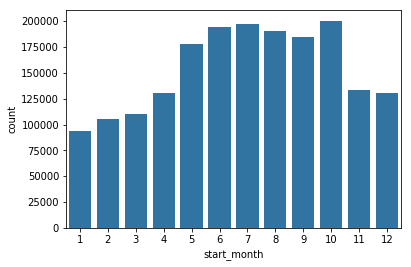

In [77]:
# Check seasonability only for 2018 as it is complete
df_year = df_master.query('start_year == "2018"')
base_color = sns.color_palette()[0]
level_order = ['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12']
ordered_cat = pd.api.types.CategoricalDtype(ordered = True, categories = level_order)
df_year['start_month'] = df_year['start_month'].astype(ordered_cat)
sns.countplot(data = df_year, x = 'start_month', color = base_color);

As expected, entries increase for warmer months, not expected to be so high for end of the year but might be explained also by other seasonability factors.

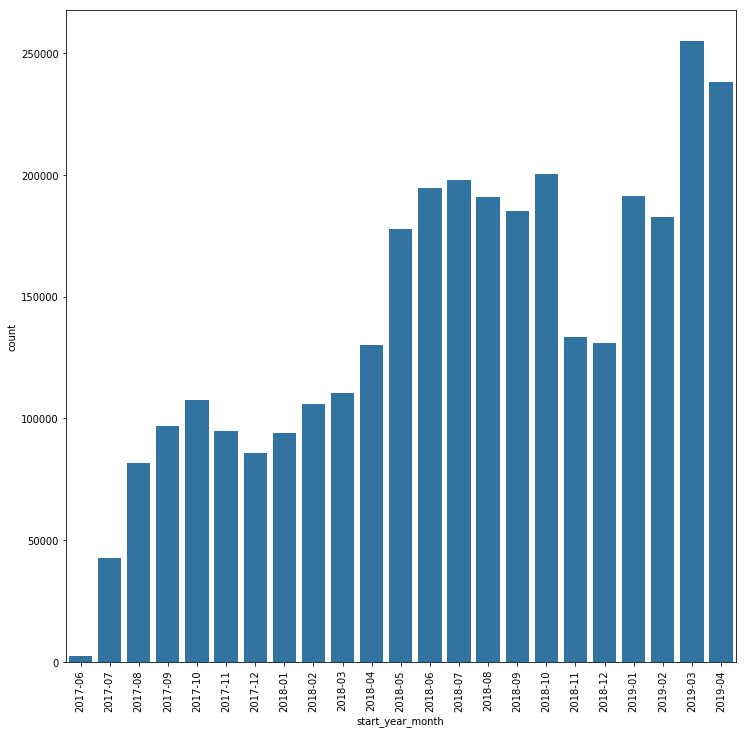

In [79]:
# Check evolution over month and year
plt.figure(figsize=[12, 12])
base_color = sns.color_palette()[0]
level_order = ['2017-06', '2017-07', '2017-08', '2017-09', '2017-10', '2017-11', '2017-12', '2018-01', '2018-02', 
               '2018-03', '2018-04', '2018-05', '2018-06', '2018-07', '2018-08', '2018-09', '2018-10', '2018-11', 
               '2018-12', '2019-01', '2019-02', '2019-03', '2019-04']
ordered_cat = pd.api.types.CategoricalDtype(ordered = True, categories = level_order)
df_master['start_year_month'] = df_master['start_year_month'].astype(ordered_cat)
sns.countplot(data = df_master, x = 'start_year_month', color = base_color)
plt.xticks(rotation=90);

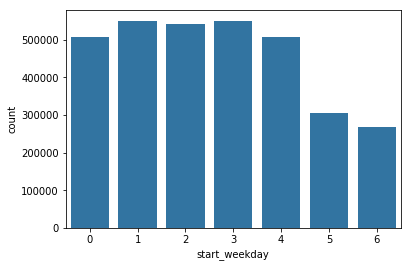

In [80]:
base_color = sns.color_palette()[0]
level_order = ['0', '1', '2', '3', '4', '5', '6']
ordered_cat = pd.api.types.CategoricalDtype(ordered = True, categories = level_order)
df_master['start_weekday'] = df_master['start_weekday'].astype(ordered_cat)
sns.countplot(data = df_master, x = 'start_weekday', color = base_color);

Least active days are Saturday and Sunday, with Sunday having the lowest number of rentals. This was not expected as many people like to bike during the weekend, this might be explained by the fact that people use the rental bikes mostly for commuting to work/university.

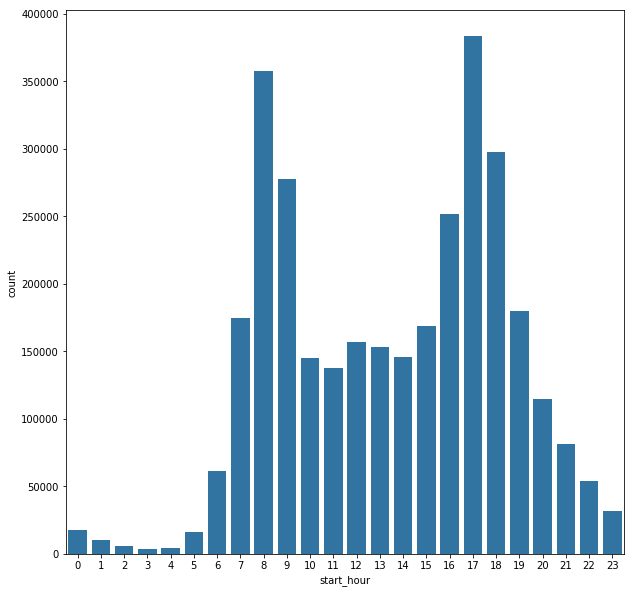

In [81]:
base_color = sns.color_palette()[0]
level_order = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17',
               '18', '19', '20', '21', '22', '23']
ordered_cat = pd.api.types.CategoricalDtype(ordered = True, categories = level_order)
df_master['start_hour'] = df_master['start_hour'].astype(ordered_cat)
plt.figure(figsize=[10, 10])
sns.countplot(data = df_master, x = 'start_hour', color = base_color);

The data looks roughly bimodal, with one peak between 7am and 10am, and a second peak between 16 and 19, which was as expected from the weekday graph above, that users rent bikes mostly to commute to and from work/univeristy.

Finally, I will look at the categorial data. Will start with the distribution in gender, followed by user type and end with the fact that the trip was shared or not.

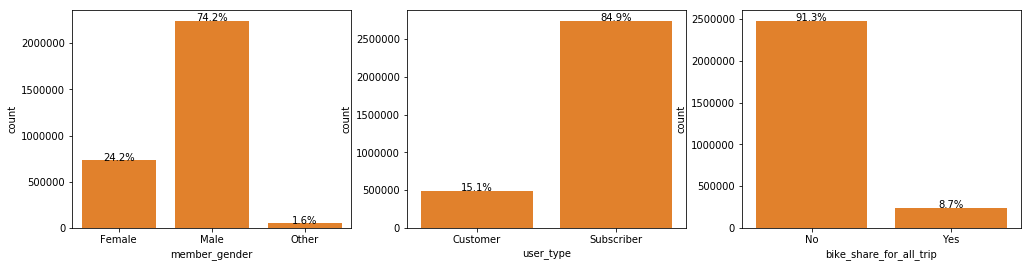

In [82]:
plt.figure(figsize = [17, 4])

plt.subplot(1,3,1)
# create the plot
base_color = sns.color_palette()[1]
sns.countplot(data = df_master, x = 'member_gender', color = base_color)

# add annotations
n_points = len(df_master[df_master['member_gender'].notnull()])
cat_counts = df_master['member_gender'].value_counts()
locs, labels = plt.xticks() # get the current tick locations and labels

# loop through each pair of locations and labels
for loc, label in zip(locs, labels):

    # get the text property for the label to get the correct count
    count = cat_counts[label.get_text()]
    pct_string = '{:0.1f}%'.format(100*count/n_points)

    # print the annotation just below the top of the bar
    plt.text(loc, count-8, pct_string, ha = 'center', color = 'black')
    
plt.subplot(1,3,2)
# create the plot
base_color = sns.color_palette()[1]
sns.countplot(data = df_master, x = 'user_type', color = base_color)

# add annotations
n_points = df_master.shape[0]
cat_counts = df_master['user_type'].value_counts()
locs, labels = plt.xticks() # get the current tick locations and labels

# loop through each pair of locations and labels
for loc, label in zip(locs, labels):

    # get the text property for the label to get the correct count
    count = cat_counts[label.get_text()]
    pct_string = '{:0.1f}%'.format(100*count/n_points)

    # print the annotation just below the top of the bar
    plt.text(loc, count-8, pct_string, ha = 'center', color = 'black')

plt.subplot(1,3,3)
# create the plot
base_color = sns.color_palette()[1]
sns.countplot(data = df_master, x = 'bike_share_for_all_trip', color = base_color)

# add annotations
n_points = len(df_master[df_master['bike_share_for_all_trip'].notnull()])
cat_counts = df_master['bike_share_for_all_trip'].value_counts()
locs, labels = plt.xticks() # get the current tick locations and labels

# loop through each pair of locations and labels
for loc, label in zip(locs, labels):

    # get the text property for the label to get the correct count
    count = cat_counts[label.get_text()]
    pct_string = '{:0.1f}%'.format(100*count/n_points)

    # print the annotation just below the top of the bar
    plt.text(loc, count-8, pct_string, ha = 'center', color = 'black')

Majority of the users are males.

Majority of users are subscribers, so users of opportunity and not long term customers.

Most of the trips were not shared which was also as expected since the majority of the rentals are for a short time.

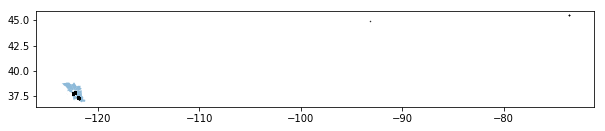

In [83]:
# Plot a sample of the data on the map
fig, ax = plt.subplots(figsize=(10,10))
sf_map.plot(ax =ax, alpha = .5)
geo_df.sample(1000000).plot(ax=ax, markersize = 0.2, color='black', marker = "o")

In [84]:
# Found coordinates out of the San Francisco bay area
df_master.query('start_station_latitude>38')

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,...,geometry_end,geometry,duration_min,start_month,start_year,start_hour,start_weekday,start_date,start_year_month,age
1153196,283,2018-06-29 08:57:14.525,2018-06-29 09:01:57.582,0,NaN,45.51,-73.57,0,NaN,45.51,...,POINT (-73.56999999999999 45.51),POINT (-73.56999999999999 45.51),4.716667,6,2018,8,4,2018-06-29,2018-06,42.0
1199788,1443,2018-06-22 13:36:13.056,2018-06-22 14:00:16.996,0,NaN,45.51,-73.57,0,NaN,45.51,...,POINT (-73.56999999999999 45.51),POINT (-73.56999999999999 45.51),24.050000,6,2018,13,4,2018-06-22,2018-06,42.0
1277552,191,2018-06-11 08:23:37.019,2018-06-11 08:26:48.599,0,NaN,45.51,-73.57,0,NaN,45.51,...,POINT (-73.56999999999999 45.51),POINT (-73.56999999999999 45.51),3.183333,6,2018,8,0,2018-06-11,2018-06,30.0
1335753,69,2018-06-01 13:56:04.027,2018-06-01 13:57:13.648,0,NaN,40.66,-74.01,0,NaN,40.66,...,POINT (-74.01000000000001 40.66),POINT (-74.01000000000001 40.66),1.150000,6,2018,13,4,2018-06-01,2018-06,43.0
1335770,126,2018-06-01 13:51:52.771,2018-06-01 13:53:58.967,0,NaN,40.66,-74.01,0,NaN,40.66,...,POINT (-74.01000000000001 40.66),POINT (-74.01000000000001 40.66),2.100000,6,2018,13,4,2018-06-01,2018-06,32.0
1335791,67,2018-06-01 13:47:53.131,2018-06-01 13:49:00.368,0,NaN,40.66,-74.01,0,NaN,40.66,...,POINT (-74.01000000000001 40.66),POINT (-74.01000000000001 40.66),1.116667,6,2018,13,4,2018-06-01,2018-06,32.0
1604948,501,2018-08-21 12:11:52.500,2018-08-21 12:20:13.500,0,NaN,45.50,-73.57,0,NaN,45.51,...,POINT (-73.56999999999999 45.51),POINT (-73.56999999999999 45.5),8.350000,8,2018,12,1,2018-08-21,2018-08,39.0
1611788,1023,2018-08-20 12:07:06.500,2018-08-20 12:24:09.500,0,NaN,45.50,-73.57,0,NaN,45.51,...,POINT (-73.56999999999999 45.51),POINT (-73.56999999999999 45.5),17.050000,8,2018,12,0,2018-08-20,2018-08,39.0
1612386,94,2018-08-20 09:53:14.500,2018-08-20 09:54:48.500,0,NaN,45.51,-73.57,0,NaN,45.51,...,POINT (-73.56999999999999 45.51),POINT (-73.56999999999999 45.51),1.566667,8,2018,9,0,2018-08-20,2018-08,39.0
1653836,3781,2018-08-13 11:23:24.700,2018-08-13 12:26:25.840,0,NaN,44.95,-93.22,0,NaN,44.95,...,POINT (-93.22 44.95),POINT (-93.22 44.95),63.016667,8,2018,11,0,2018-08-13,2018-08,32.0


In [85]:
# Remove the entries with these coordinates
df_master.drop(df_master.query('start_station_latitude>38').index, inplace = True)

In [86]:
geo_df = gpd.GeoDataFrame(df_master, crs=crs, geometry=df_master.geometry_start)

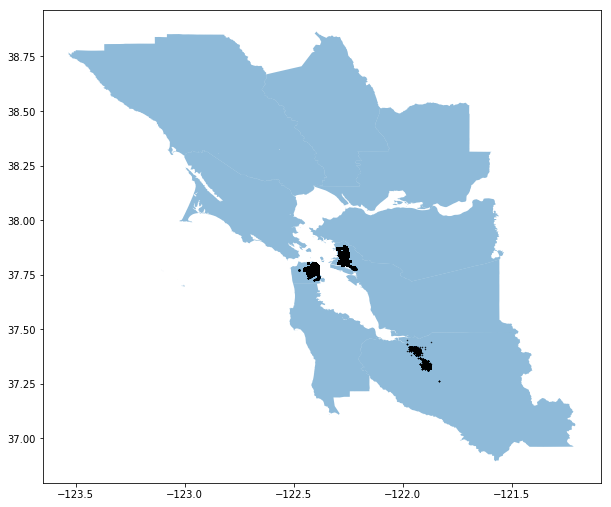

In [87]:
fig, ax = plt.subplots(figsize=(10,10))
sf_map.plot(ax =ax, alpha = .5)
geo_df.sample(1000000).plot(ax=ax, markersize = 0.2, color='black', marker = "o");

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

The duration in seconds variable was highly skewed to the right with a wide range of values, it has a long-tailed distribution, with a lot of rentals on the duration short end, and few on the long distance end, so I looked at the data using a log transform. Under the transformation, the data was still skewed to the right but I could clearly see the peak being between 500 and 700 seconds.

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

When investigating the duration, age and distance in km variables, a number of outlier points were identified. The distance points look normal as it can be that the rental took longer than 8000 seconds, I removed however the entries that took longer. What surprised me were the entries with users over 100 years old, this seems to be highly unlikely. For safety, I removed them. I also decided to removed entries I found to have a higher distance than 80 km between start and end station as the total distance between San Francisco and San Jose is around 77km and when looking at the data the end station name indicates also that these entries are just test entries. The entries between more than 10 km and up to 80 were also quite few so I decided to remove them also.<br>
Another issue I found in the data were some geo coordinates out of the San Francisco bay area, since the other value looked also wrong I decided to removed these entries. 


## Bivariate Exploration



In [88]:
# Create lists of numerical and categorical values
numeric_vars = ['duration_sec', 'age', 'distance_km']
categoric_vars = ['member_gender', 'user_type', 'bike_share_for_all_trip']
time_vars = ['start_month', 'start_weekday', 'start_hour']

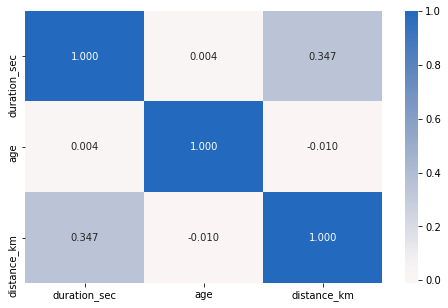

In [89]:
# Correlation plot
plt.figure(figsize = [8, 5])
sns.heatmap(df_master[numeric_vars].corr(), annot = True, fmt = '.3f',
           cmap = 'vlag_r', center = 0)
plt.show()

/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:1472: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  return self._getitem_tuple(key)
/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:754: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:755: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


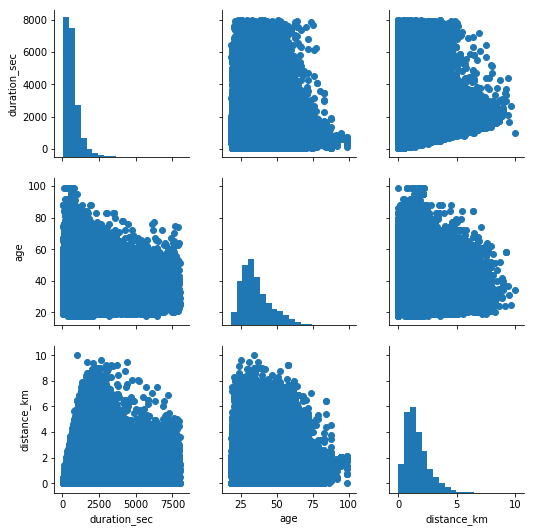

In [90]:
# plot matrix: sample 500000 entries so that plots are clearer and
# they render faster
samples = np.random.choice(df_master.shape[0], 500000, replace = False)
df_samp = df_master.loc[samples,:]

g = sns.PairGrid(data = df_samp, vars = numeric_vars)
g = g.map_diag(plt.hist, bins = 20)
g.map_offdiag(plt.scatter);

Seems there are is only a low positive correlation between duration_sec and distance_km.  <br>
I will further look on the duration_sec and age closely.

/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


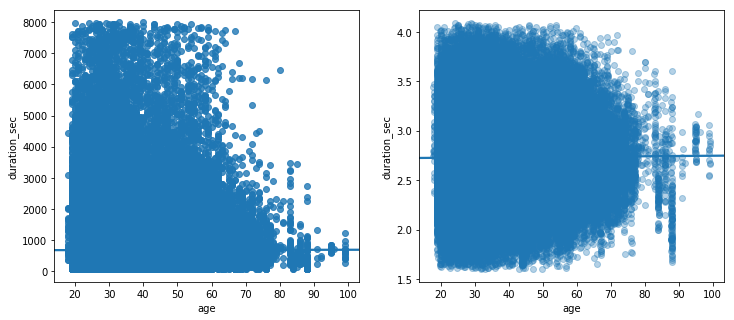

In [91]:
# age vs duration_sec
plt.figure(figsize = [12, 5])

plt.subplot(1, 2, 1)
sns.regplot(data = df_master.sample(500000), x = 'age', y = 'duration_sec');

plt.subplot(1, 2, 2)
df_sample = df_master.sample(500000)
def log_trans(x, inverse = False):
    if not inverse:
        return np.log10(x)
    else:
        return np.power(10, x)

sns.regplot(df_sample['age'], df_sample['duration_sec'].apply(log_trans), 
            x_jitter = 0.2, y_jitter = 0.2, scatter_kws = {'alpha' : 1/3});

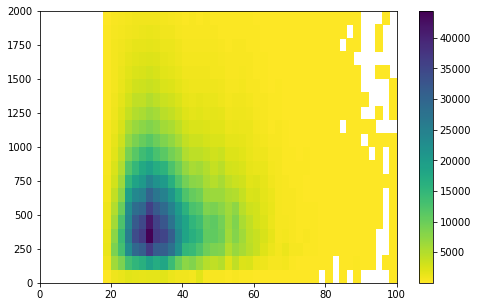

In [92]:
# age vs duration_sec: heat map with bin edges between values
plt.figure(figsize = [8, 5])
bins_x = np.arange(0, 100+2, 2)
bins_y = np.arange(0, 2000+100, 100)
plt.hist2d(data = df_master, x = 'age', y = 'duration_sec',
           bins = [bins_x, bins_y], cmap = 'viridis_r', cmin = 0.5)
plt.colorbar();

It seems that most shorter rides were booked by younger people, between 20 and 40 years old.

I will check the relationship between age and sitance_km next.

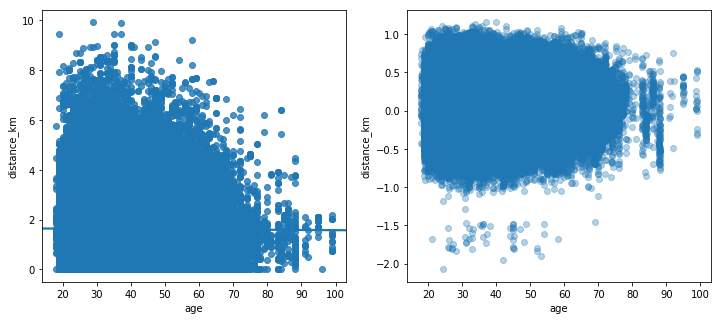

In [93]:
# age vs distance_km
plt.figure(figsize = [12, 5])

plt.subplot(1,2,1)
sns.regplot(data = df_master.sample(500000), x = 'age', y = 'distance_km');

plt.subplot(1,2,2)
df_sample = df_master.sample(500000)
def log_trans(x, inverse = False):
    if not inverse:
        return np.log10(x)
    else:
        return np.power(10, x)

sns.regplot(df_sample['age'], df_sample['distance_km'].apply(log_trans), 
            x_jitter = 0.2, y_jitter = 0.2, scatter_kws = {'alpha' : 1/3});

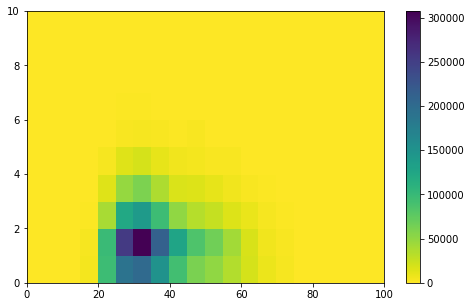

In [94]:
# age vs distance_km: heat map with bin edges between values
plt.figure(figsize = [8, 5])
bins_x = np.arange(0, 100+5, 5)
bins_y = np.arange(0, 10+1, 1)
plt.hist2d(data = df_master, x = 'age', y = 'distance_km',
           bins = [bins_x, bins_y], cmap = 'viridis_r')
plt.colorbar();

Same as above, seems that higher distances between start and end station were used by younger users, however since they also represent the majority of the data there might be no relationship, as the correlation suggests.

Further will look at the relationship between distance_km and duration_sec based on a sample of data and with the same amount of sample data in a log-scaled plot with outliers removed.

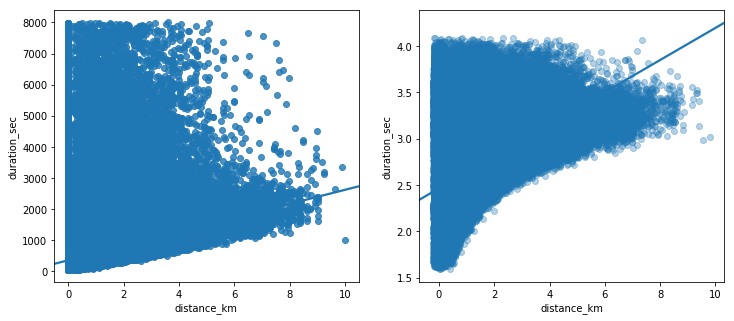

In [95]:
# distance_km vs duration_sec
plt.figure(figsize = [12, 5])

plt.subplot(1,2,1)
sns.regplot(data = df_master.sample(500000), x = 'distance_km', y = 'duration_sec');

plt.subplot(1,2,2)
# Sample data for only distances under 30km, just to zoom in and better see the line
df_sample = df_master.sample(500000)
def log_trans(x, inverse = False):
    if not inverse:
        return np.log10(x)
    else:
        return np.power(10, x)

sns.regplot(df_sample['distance_km'], df_sample['duration_sec'].apply(log_trans), 
            x_jitter = 0.2, y_jitter = 0.2, scatter_kws = {'alpha' : 1/3});

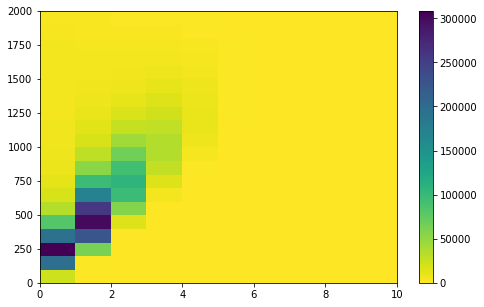

In [96]:
# distance_km vs duration_sec: heat map with bin edges between values
plt.figure(figsize = [8, 5])
bins_x = np.arange(0, 10+1, 1)
bins_y = np.arange(0, 2000+100, 100)
plt.hist2d(data = df_master, x = 'distance_km', y = 'duration_sec',
           bins = [bins_x, bins_y], cmap = 'viridis_r')
plt.colorbar();

As observed also in the correlation heatmap the most visible relationship is between the distance and duration, as expected initially but not clearly visible in the absolute values.

Next I will look at the relationships between the numerical, categorical and time variables.

/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:1241: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(UserWarning(msg))


<Figure size 1080x1080 with 0 Axes>

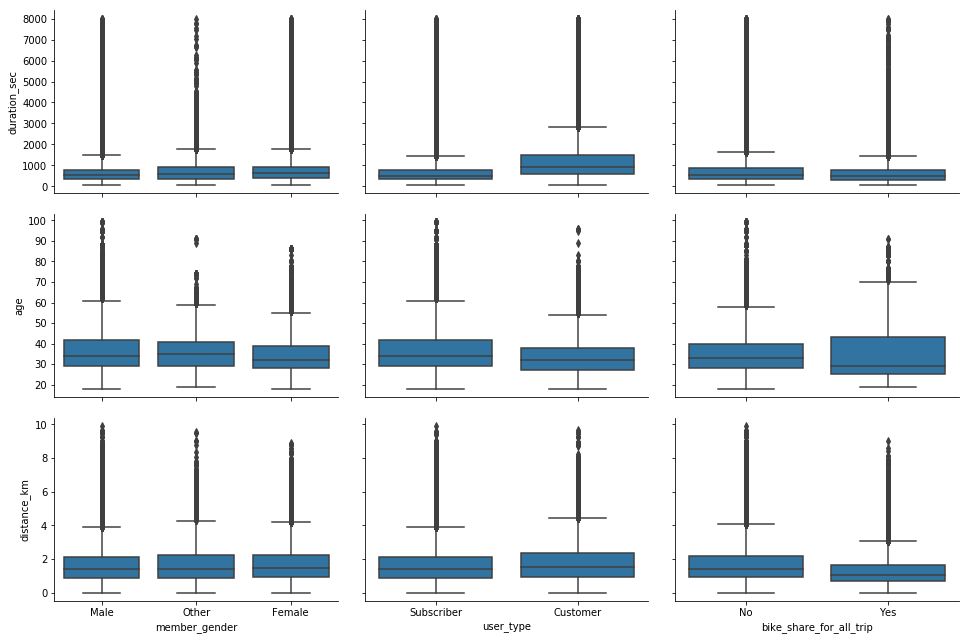

In [97]:
# Plot matrix of numeric variables against categorical variables

samples = np.random.choice(df_master.shape[0], 500000, replace = False)
df_samp = df_master.loc[samples,:]

def boxgrid(x, y, **kwargs):
    default_color = sns.color_palette()[0]
    sns.boxplot(x, y, color = default_color)

plt.figure(figsize = [15, 15])
g = sns.PairGrid(data = df_samp, y_vars = numeric_vars, x_vars = categoric_vars,
                size = 3, aspect = 1.5)
g.map(boxgrid)
plt.show();

/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:1241: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(UserWarning(msg))


<Figure size 1080x1080 with 0 Axes>

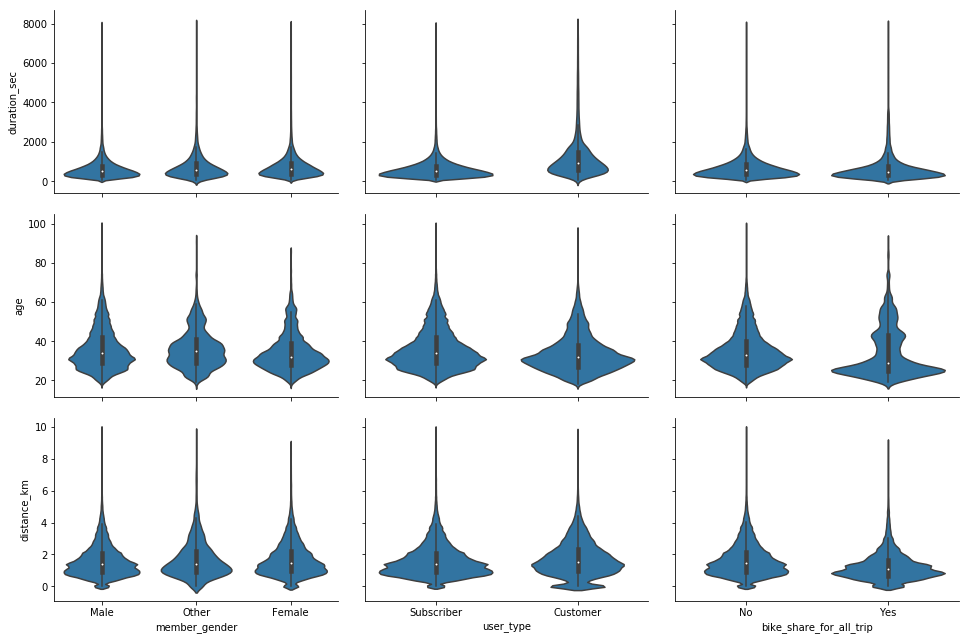

In [98]:
# Violin plot for the same variables
def boxgrid(x, y, **kwargs):
    default_color = sns.color_palette()[0]
    sns.violinplot(x, y, color = default_color)

plt.figure(figsize = [15, 15])
g = sns.PairGrid(data = df_samp, y_vars = numeric_vars, x_vars = categoric_vars,
                size = 3, aspect = 1.5)
g.map(boxgrid)
plt.show();

From the box & violin plots we can observe the following:
- Men that use the bike rental service are on average older than the women who use the service
- Subscribers are older on average than the customers
- There is quit a wide spread for customers' ages sharing the bike compared to the trips where the bike was not shared
- Women tend to rent the bike for a longer distances between start and end stations but most of the outliers for much longer distances are belonging to men
- Customers tend to rent for slightly longer distances between start and end station
- Bike was shared mostly for shorter distances  between start and end station<br>

As the duration_sec is not clear, we will zoom in and skip outliers on the upper side.

/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:1241: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(UserWarning(msg))


<Figure size 1080x1080 with 0 Axes>

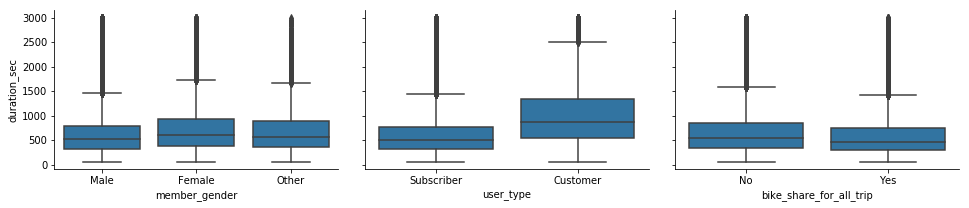

In [99]:
# Plot matrix of numeric variables against categorical variables zoomed in to the box plotx

samples = np.random.choice(df_master.shape[0], 500000, replace = False)
df_samp = df_master.loc[samples,:]

def boxgrid(x, y, **kwargs):
    default_color = sns.color_palette()[0]
    sns.boxplot(x, y, color = default_color)

plt.figure(figsize = [15, 15])
g = sns.PairGrid(data = df_samp.query('duration_sec<3000'), y_vars = 'duration_sec', x_vars = categoric_vars,
                size = 3, aspect = 1.5)
g.map(boxgrid)
plt.show();

/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:1241: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(UserWarning(msg))


<Figure size 1080x1080 with 0 Axes>

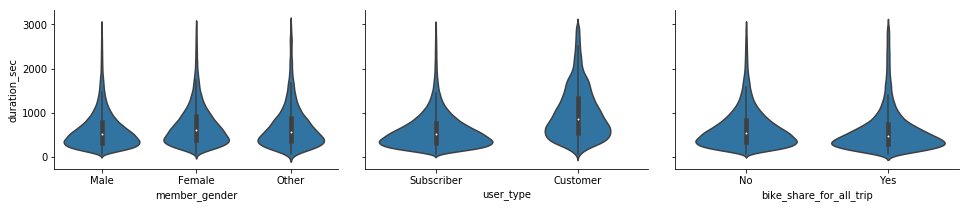

In [100]:
# Violin plot for the same variables

def boxgrid(x, y, **kwargs):
    default_color = sns.color_palette()[0]
    sns.violinplot(x, y, color = default_color)

plt.figure(figsize = [15, 15])
g = sns.PairGrid(data = df_samp.query('duration_sec<3000'), y_vars = 'duration_sec', x_vars = categoric_vars,
                size = 3, aspect = 1.5)
g.map(boxgrid)
plt.show();

From these box & violin plots we can conclude that:
- Women rent the bikes for longer durations
- Subscribers rent the bike for shorter durations which makes sense since they pay per subscription and not per minute and ride
- Bikes tends to be shared for shorter duration trips

/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:1241: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(UserWarning(msg))


<Figure size 1080x1080 with 0 Axes>

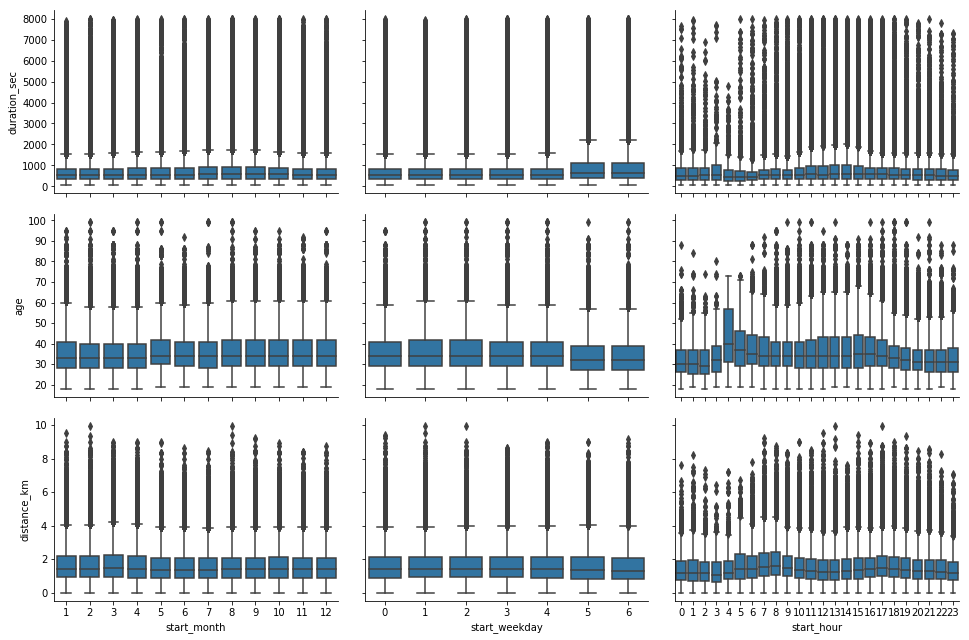

In [101]:
# Plot matrix of numeric variables against time variables
samples = np.random.choice(df_master.shape[0], 500000, replace = False)
df_samp = df_master.loc[samples,:]

def boxgrid(x, y, **kwargs):
    default_color = sns.color_palette()[0]
    sns.boxplot(x, y, color = default_color)

plt.figure(figsize = [15, 15])
g = sns.PairGrid(data = df_samp, y_vars = numeric_vars, x_vars = time_vars,
                size = 3, aspect = 1.5)
g.map(boxgrid)
plt.show();

Older users rent bikes at 5-6am while younger users tend to rent more during the weekend.

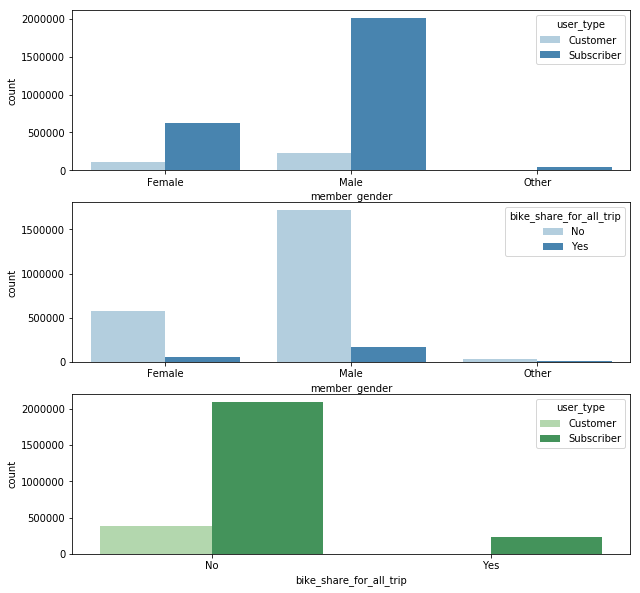

In [102]:
# Using the full data to check the categoric variables
plt.figure(figsize = [10, 10])

# subplot 1: member_gender vs user_type
plt.subplot(3, 1, 1)
sns.countplot(data = df_master, x = 'member_gender', hue = 'user_type', palette = 'Blues')

# subplot 2: member_gender vs bike_share_for_all_trip
ax = plt.subplot(3, 1, 2)
sns.countplot(data = df_master, x = 'member_gender', hue = 'bike_share_for_all_trip', palette = 'Blues')

# subplot 3: bike_share_for_all_trip vs. user_type
ax = plt.subplot(3, 1, 3)
sns.countplot(data = df_master, x = 'bike_share_for_all_trip', hue = 'user_type', palette = 'Greens')

plt.show()

From the plots above we can observe that:
- There are more female ratio of customers to subscribers
- Sharing the bike doesn't seem to be impacted by the gender of the user
- Sharing the bike is more common among subscribers

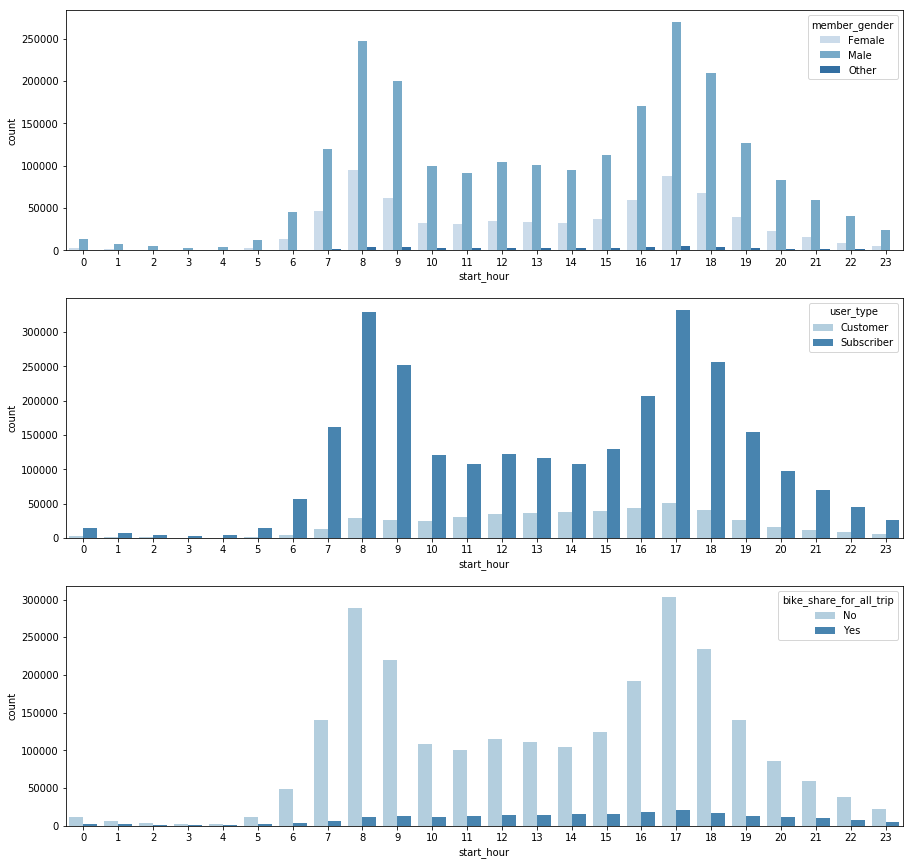

In [103]:
# Check the start_hour variable vs categoric features
plt.figure(figsize = [15, 15])

# subplot 1: start_hour vs member_gender
plt.subplot(3, 1, 1)
sns.countplot(data = df_master, x = 'start_hour', hue = 'member_gender', palette = 'Blues')

# subplot 2: start_hour vs. user_type
ax = plt.subplot(3, 1, 2)
sns.countplot(data = df_master, x = 'start_hour', hue = 'user_type', palette = 'Blues')

# subplot 3: start_hour vs. bike_share_for_all_trip
ax = plt.subplot(3, 1, 3)
sns.countplot(data = df_master, x = 'start_hour', hue = 'bike_share_for_all_trip', palette = 'Blues')

plt.show()

- start_hour by member_gender: both males and females follow the same pattern, with the two peaks in the data, with the only difference that during the night hours mostly male users are renting bikes
- start_hour by user_type: Customer users don't seem to be affected by the beginning of the day, just towards the end we see a clear increase while subscribers are reaching two peaks, one at the beginning and one at the end of a working day
- shared bike trips seem to be more stable during the day while not shared bikes follow the trend of the two spikes

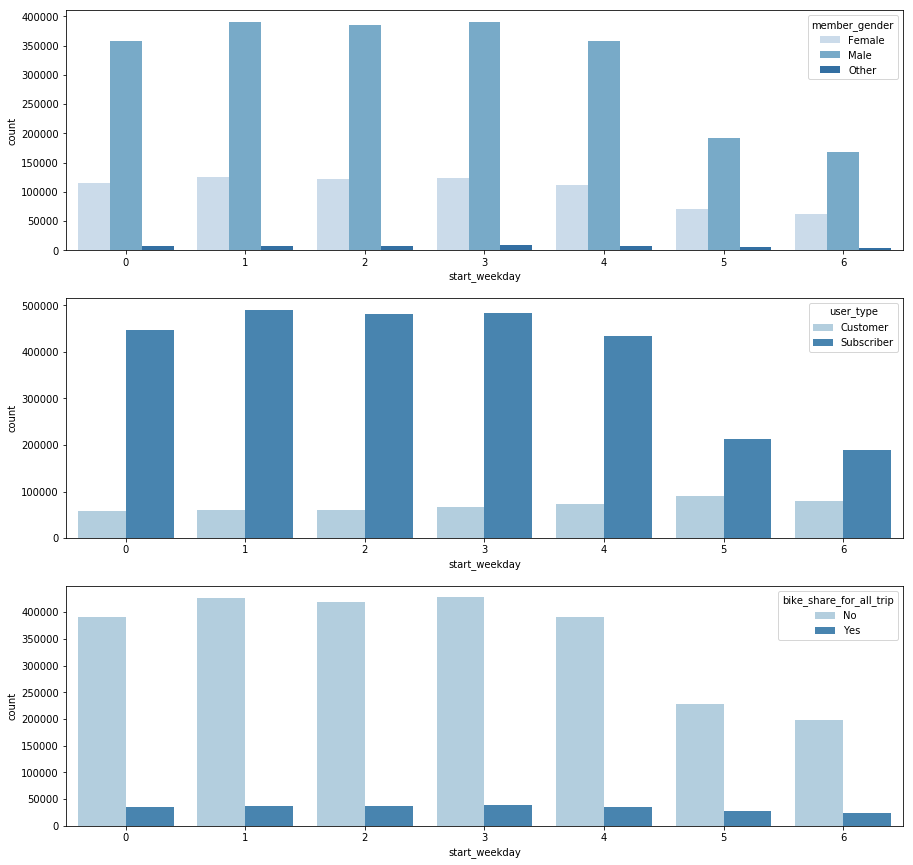

In [104]:
# Check the start_weekday variable vs categoric features
plt.figure(figsize = [15, 15])

# subplot 1: start_weekday vs member_gender
plt.subplot(3, 1, 1)
sns.countplot(data = df_master, x = 'start_weekday', hue = 'member_gender', palette = 'Blues')

# subplot 2: start_weekday vs. user_type
ax = plt.subplot(3, 1, 2)
sns.countplot(data = df_master, x = 'start_weekday', hue = 'user_type', palette = 'Blues')

# subplot 3: start_weekday vs. bike_share_for_all_trip
ax = plt.subplot(3, 1, 3)
sns.countplot(data = df_master, x = 'start_weekday', hue = 'bike_share_for_all_trip', palette = 'Blues')

plt.show()

While both genders and the bike shared/not shared follow the trend of reducing during the weekend, customer users tend to increase usage in the weekend.

/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


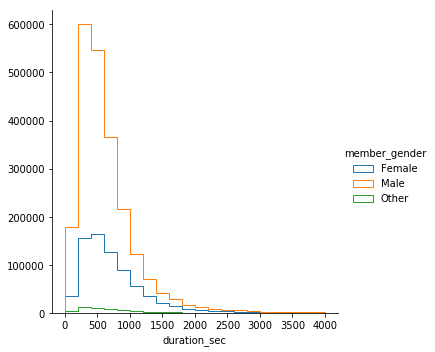

In [105]:
bin_edges = np.arange(0, df_master.query('duration_sec<4000')['duration_sec'].max()+200, 200)
g = sns.FacetGrid(data = df_master, hue = 'member_gender', size = 5)
g.map(plt.hist, "duration_sec", bins = bin_edges, histtype = 'step')
g.add_legend();

/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


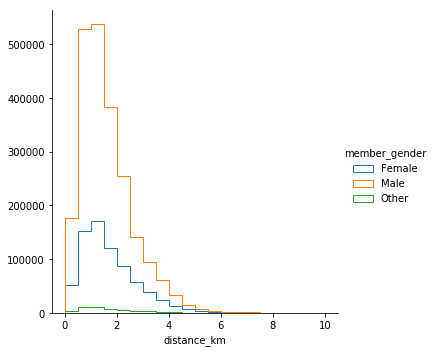

In [106]:
bin_edges = np.arange(0, df_master['distance_km'].max()+0.5, 0.5)
g = sns.FacetGrid(data = df_master, hue = 'member_gender', size = 5)
g.map(plt.hist, "distance_km", bins = bin_edges, histtype = 'step')
g.add_legend();

/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


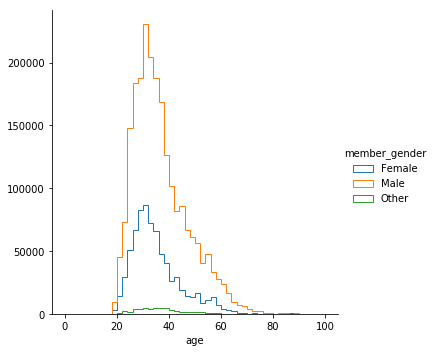

In [107]:
bin_edges = np.arange(0, df_master['age'].max()+2, 2)
g = sns.FacetGrid(data = df_master, hue = 'member_gender', size = 5)
g.map(plt.hist, "age", bins = bin_edges, histtype = 'step')
g.add_legend();

In [108]:
# compute the logarithm of duration_sec to make multivariate plotting easier
def log_trans(x, inverse = False):
    """ quick function for computing log and power operations """
    if not inverse:
        return np.log10(x)
    else:
        return np.power(10, x)

df_master['log_duration'] = df_master['duration_sec'].apply(log_trans)

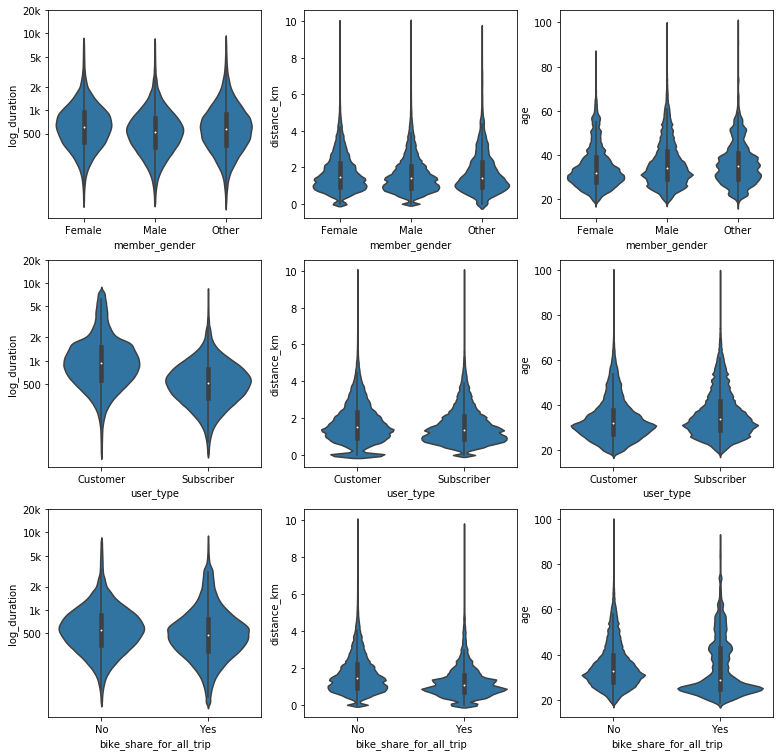

In [109]:
# plot the categorical variables against main variables again, this time
# with full data and duration_sec transformed
fig, ax = plt.subplots(ncols = 3, nrows = 3 , figsize = [13,13])
for i in range(len(categoric_vars)):
    var = categoric_vars[i]
    default_color = sns.color_palette()[0]
    sns.violinplot(data = df_master, x = var, y = 'log_duration', ax = ax[i,0],
               color = default_color)
    ax[i,0].set_yticks(log_trans(np.array([500, 1e3, 2e3, 5e3, 1e4, 2e4])))
    ax[i,0].set_yticklabels([500, '1k', '2k', '5k', '10k', '20k'])
    sns.violinplot(data = df_master, x = var, y = 'age', ax = ax[i,2],
               color = default_color)
    sns.violinplot(data = df_master, x = var, y = 'distance_km', ax = ax[i,1],
               color = default_color)


plt.show();

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?
The features of interest were duration_sec, distance_km and age.<br>
Other features:
- Categoric variables: user_type, member_gender, bike_share_for_all_trip
- Time variables: start_month, start_weekday, start_hour

**Observations:<br>**
Duration_sec vs distance_km:
- have a low positive correlation before transforming the duration_sec
- an approximately linear relationship was observed when duration_sec was plotted on a log scale<br>

Duration_sec vs age and distance_km vs age:
- no relationships observed even after transformations were done<br>

Average duration_sec, distance_km and age in time:
- while age and duration have decreased in the most recent months, distance has increased<br>

Duration_sec & categorical features:
- women tend to take longer trips than men
- customers book longer trips than subscribers which makes sense since they pay less through their subscription
- interestingly, shared bike trips are shorter than those not shared

Age & categorical features:
- female users are younger than male users overall, with male users's ages being spread over a larger age span
- customers tend to be older than subscribers
- younger users tend to share the bike for all trip more

Distance_km & categorical features:
- as observed in duration, female users have a larger distance between the start and end station
- subscribers have shorter distances between the start and end station
- bike is shared for shorter distances

Duration_sec & time variables:
- over the weekend (5&6) trip duration increases
- there is an increase at 3am and 2pm in trip duration

Age & time variables:
- younger people tend to rent more bikes during the weekend
- there is a peak in the data at 4am when above the average age people rent more bikes

Distance_km & time variables:
- larger distances between start and end station are visible more between 5 and 9am


### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?
- there are more female ratio of customers to subscribers
- sharing the bike doesn't seem to be impacted by the gender of the user
- sharing the bike is more common among subscribers
- start_hour by member_gender: both males and females follow the same pattern, with the two peaks in the data, with the only difference that during the night hours mostly male users are renting bikes
- start_hour by user_type: Customer users don't seem to be affected by the beginning of the day, just towards the end we see a clear increase while subscribers are reaching two peaks, one at the beginning and one at the end of a working day
- shared bike trips seem to be more stable during the day while not shared bikes follow the trend of the two spikes
- while both genders and the bike shared/not shared follow the trend of reducing during the weekend, customer users tend to increase usage in the weekend

## Multivariate Exploration

Check evolution of the average duration time in minutes across weekdays and hours.

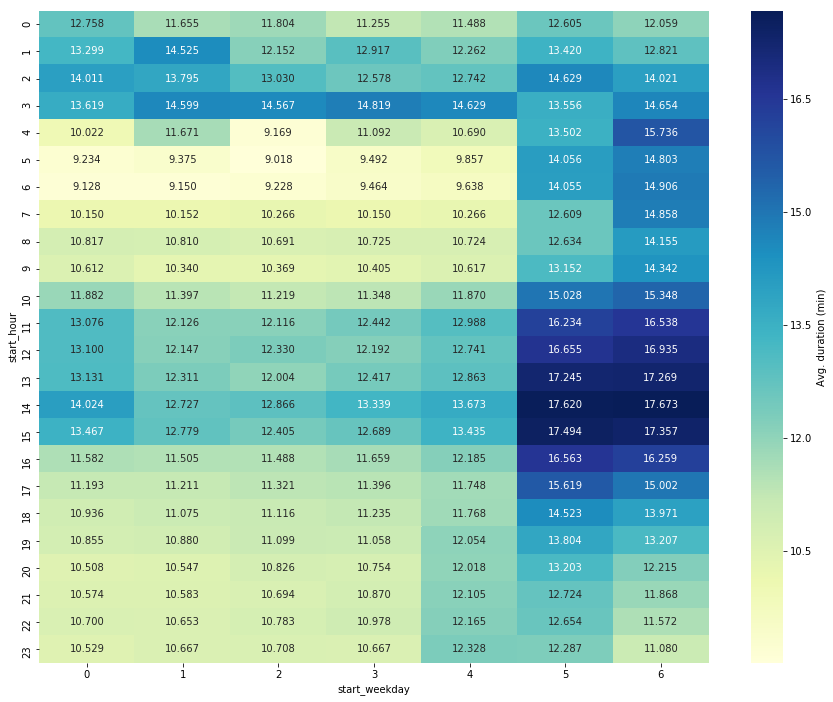

In [110]:
plt.figure(figsize = [15, 12])
cat_means = df_master.groupby(['start_weekday', 'start_hour']).mean()['duration_min']
cat_means = cat_means.reset_index(name = 'duration_min_avg')
cat_means = cat_means.pivot(index = 'start_hour', columns = 'start_weekday',
                            values = 'duration_min_avg')
sns.heatmap(cat_means, annot = True, fmt = '.3f', cmap = 'YlGnBu',
           cbar_kws = {'label' : 'Avg. duration (min)'});

Check evolution of the avergae age in minutes across weekdays and hours.

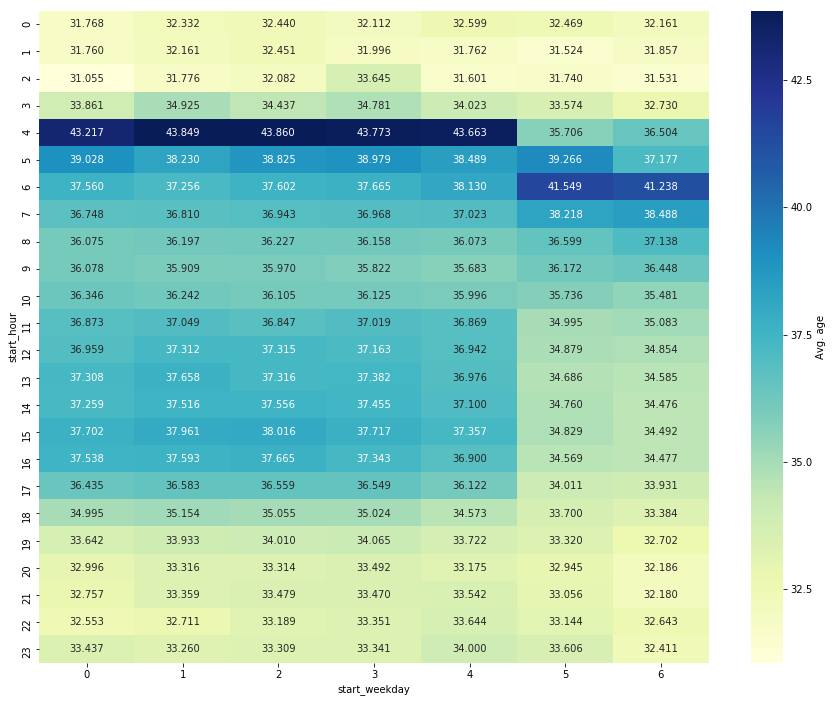

In [111]:
plt.figure(figsize = [15, 12])
cat_means = df_master.groupby(['start_weekday', 'start_hour']).mean()['age']
cat_means = cat_means.reset_index(name = 'age_avg')
cat_means = cat_means.pivot(index = 'start_hour', columns = 'start_weekday',
                            values = 'age_avg')
sns.heatmap(cat_means, annot = True, fmt = '.3f', cmap = 'YlGnBu',
           cbar_kws = {'label' : 'Avg. age'});

Check how the two types of users differ from the avergae duration time in mintes and the age.

/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


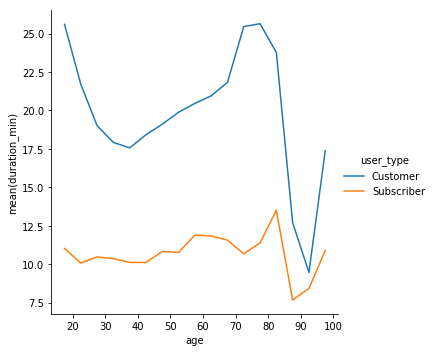

In [112]:
def mean_poly(x, y, bins = 10, **kwargs):
    """ Custom adapted line plot code. """
    # set bin edges if none or int specified
    if type(bins) == int:
        bins = np.linspace(x.min(), x.max(), bins+1)
    bin_centers = (bin_edges[1:] + bin_edges[:-1]) / 2

    # compute counts
    data_bins = pd.cut(x, bins, right = False,
                       include_lowest = True)
    means = y.groupby(data_bins).mean()

    # create plot
    plt.errorbar(x = bin_centers, y = means, **kwargs)

bin_edges = np.arange(0, df_master['age'].max()+5, 5)
g = sns.FacetGrid(data = df_master, hue = 'user_type', size = 5)
g.map(mean_poly, "age", "duration_min", bins = bin_edges)
g.set_ylabels('mean(duration_min)')
g.add_legend();

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

I looked at average trip duration (min) and average user's age on weekdays and hours. The multivariate exploration shows that longer trips are made during the weekend and around lunch time during the week.<br>
Older users tend to rent bikes during the earlier hours of the day and weekend, while during night hours mostly younger users rent bikes.<br>
Looking at the data across hours and weekdays gave a better feeling of the users behaviour that was not so clear from bivariate exploration. 

### Were there any interesting or surprising interactions between features?

It was interesting to see that longer trips were made so early in the morning during the week and that around similar early hours these trips seem to be made by older users above the average so there seems to be a relationship there that was not visible before. 

### Expot dataframe to csv file

In [113]:
df_master.to_csv('fordgobike_master.csv', index = False)

### Resources:
1. For combining csv files: https://www.freecodecamp.org/news/how-to-combine-multiple-csv-files-with-8-lines-of-code-265183e0854/<br>
2. Concatenate dataframes: https://www.datacamp.com/community/tutorials/joining-dataframes-pandas
3. Calculate distance in km based on coordinates: https://stackoverflow.com/questions/29545704/fast-haversine-approximation-python-pandas/29546836#29546836
4. GeoPandas 101: https://towardsdatascience.com/geopandas-101-plot-any-data-with-a-latitude-and-longitude-on-a-map-98e01944b972
5. Geopandas: http://geopandas.org/projections.html
6. San Francisco Bay shape file: https://geodata.lib.berkeley.edu/catalog/ark28722-
7. Replace values in a column: https://stackoverflow.com/questions/31511997/pandas-dataframe-replace-all-values-in-a-column-based-on-condition
